In [11]:
"""
Imports
"""
import numpy as np
import pickle
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Camera Calibration

In [4]:
"""
# object points represent the object's x,y,z coordinates in the real world,
as opposd to coordinates in the camera image.
Since the chessboard is 9 x 6, we will have 9*6 = 54 points, each with 3 coordinates.

Set the x,y coordinates to all the possible coordinates where
x ranges from 0 to 8 (left to right)
y ranges from 0 to 5 (top to bottom)
"""
objp = np.zeros((6*9,3), np.float32)
objp[0:2]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [15]:
"""
The next few steps are getting all combinations of x,y coordinates
where x is from 0 to 8 and y is from 0 to 5.
numpy.mgrid gives us a 2 x 9 x 6, where the 2 is for the x and the y coordinates
"""
objp_tmp = np.mgrid[0:9, 0:6]
objp_tmp

array([[[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8]],

       [[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]])

In [16]:
objp_tmp.shape

(2, 9, 6)

In [17]:
"""
Taking the transpose gives us a 6 x 9 x 2, so the x,y coordinates
are now paired together
"""
objp_tmp = objp_tmp.T
objp_tmp

array([[[0, 0],
        [1, 0],
        [2, 0],
        [3, 0],
        [4, 0],
        [5, 0],
        [6, 0],
        [7, 0],
        [8, 0]],

       [[0, 1],
        [1, 1],
        [2, 1],
        [3, 1],
        [4, 1],
        [5, 1],
        [6, 1],
        [7, 1],
        [8, 1]],

       [[0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2],
        [5, 2],
        [6, 2],
        [7, 2],
        [8, 2]],

       [[0, 3],
        [1, 3],
        [2, 3],
        [3, 3],
        [4, 3],
        [5, 3],
        [6, 3],
        [7, 3],
        [8, 3]],

       [[0, 4],
        [1, 4],
        [2, 4],
        [3, 4],
        [4, 4],
        [5, 4],
        [6, 4],
        [7, 4],
        [8, 4]],

       [[0, 5],
        [1, 5],
        [2, 5],
        [3, 5],
        [4, 5],
        [5, 5],
        [6, 5],
        [7, 5],
        [8, 5]]])

In [18]:
objp_tmp.shape

(6, 9, 2)

In [19]:
"""
In order to flatten this 3d matrix to a 2D,
We specify that the inner-most dimension have 2 values (x,y),
and the outer dimension is however many rows that exist for
6 x 9 coordinates (54)
"""
objp_tmp = objp_tmp.reshape(-1,2)
objp_tmp

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [8, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [6, 1],
       [7, 1],
       [8, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [6, 2],
       [7, 2],
       [8, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [6, 3],
       [7, 3],
       [8, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [8, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5],
       [6, 5],
       [7, 5],
       [8, 5]])

In [20]:
objp_tmp.shape

(54, 2)

In [21]:
"""
Finally, set the first 2 values of objp, which are the x,y coordinates.
Notice that the 3rd z coordinate remains zero for all coordinates
"""
objp[:,:2] = objp_tmp
objp

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 8.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 8.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 8.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 8.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 1.,  4.,  0.],
       [ 2.,  4.,  0.],
       [ 3.,  4.,  0.],
       [ 4.,  4.,  0.],
       [ 5.,  4.

In [22]:
objp.shape

(54, 3)

In [26]:
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
images

['camera_cal/calibration1.jpg',
 'camera_cal/calibration10.jpg',
 'camera_cal/calibration11.jpg',
 'camera_cal/calibration12.jpg',
 'camera_cal/calibration13.jpg',
 'camera_cal/calibration14.jpg',
 'camera_cal/calibration15.jpg',
 'camera_cal/calibration16.jpg',
 'camera_cal/calibration17.jpg',
 'camera_cal/calibration18.jpg',
 'camera_cal/calibration19.jpg',
 'camera_cal/calibration2.jpg',
 'camera_cal/calibration20.jpg',
 'camera_cal/calibration3.jpg',
 'camera_cal/calibration4.jpg',
 'camera_cal/calibration5.jpg',
 'camera_cal/calibration6.jpg',
 'camera_cal/calibration7.jpg',
 'camera_cal/calibration8.jpg',
 'camera_cal/calibration9.jpg']

In [38]:
len(images)

20

In [39]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    #print(corners)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
           
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        #cv2.waitKey(500)
    else:
        print("could not find corners for {}".format(fname))
    """
    """
cv2.destroyAllWindows()

could not find corners for camera_cal/calibration1.jpg
could not find corners for camera_cal/calibration4.jpg
could not find corners for camera_cal/calibration5.jpg


In [54]:
"""
Now objpoints has 17 copies of the points in the 'real world'
and imgpoints has 17 sets of coordinates for the found corners.
There are 9 * 6 = 54 corners for each set.  
Each corner is represented by two coordinates (x,y)

Using the sets of image and real points, we can calibrate the camera.

The camera calibration gives us matrices and vectors that are 
used to undistort any image taken with the same camera 
(the image size is also needed for calibration)

"""
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [56]:
#ret != 0 is True
ret

1.1868973603423718

In [57]:
mtx

array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
       [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [58]:
dist

array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
         -1.28318856e-04,   2.67125290e-02]])

In [59]:
#rotation vectors
rvecs

[array([[ 0.50716545],
        [-0.22122219],
        [ 0.02988717]]), array([[ 0.03492402],
        [ 0.45739729],
        [ 0.00492867]]), array([[ 0.03471112],
        [ 0.65086688],
        [ 0.00971071]]), array([[-0.33084415],
        [ 0.65914967],
        [-0.41537657]]), array([[ 0.05531879],
        [-0.51892709],
        [-0.00398629]]), array([[-0.02434082],
        [-0.48814782],
        [ 0.0205404 ]]), array([[ 0.04125139],
        [-0.46371786],
        [-0.05619974]]), array([[ 0.21226762],
        [-0.067192  ],
        [ 0.0124846 ]]), array([[ 0.17850283],
        [-0.06187035],
        [ 0.00114955]]), array([[ 0.08447458],
        [ 0.38039934],
        [ 0.05427302]]), array([[ 0.63236599],
        [-0.04827079],
        [ 0.01721011]]), array([[-0.02563264],
        [ 0.38170173],
        [-0.00443487]]), array([[-0.44823487],
        [-0.06589252],
        [-0.01933811]]), array([[ 0.01805199],
        [ 0.02669678],
        [-0.00551439]]), array([[ 0.0178336 

In [60]:
#translation vectors
tvecs

[array([[ -2.11922855],
        [ -0.71465388],
        [ 19.53183554]]), array([[-16.99963028],
        [ -3.45711062],
        [ 31.88140225]]), array([[ -0.21898193],
        [ -3.45905797],
        [ 21.82352738]]), array([[ -6.06136681],
        [ -1.54277113],
        [ 26.6077651 ]]), array([[  5.35073144],
        [ -4.43439198],
        [ 20.69860635]]), array([[  4.46791786],
        [ -1.45553778],
        [ 19.91167384]]), array([[  4.86295442],
        [ -5.0332483 ],
        [ 19.69539304]]), array([[ -3.98286443],
        [ -1.31029172],
        [ 16.98785567]]), array([[ -3.63923607],
        [ -4.12214649],
        [ 17.72145269]]), array([[-13.0435234 ],
        [ -5.57212836],
        [ 23.64304788]]), array([[-3.83498058],
        [-1.59623848],
        [ 7.94136389]]), array([[-13.43070279],
        [ -0.45669297],
        [ 24.41876447]]), array([[ -4.40335216],
        [ -3.04835705],
        [ 10.68886726]]), array([[ -4.97952826],
        [ -3.83821782],
      

In [68]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/camera_pickle.p", "wb" ) )

In [70]:
#loading dist_pickle from pickle file
import pickle
dist_pickle = pickle.load( open( "camera_cal/camera_pickle.p", "rb" ) )
dist_pickle

{'dist': array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
          -1.28318856e-04,   2.67125290e-02]]),
 'mtx': array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
        [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])}

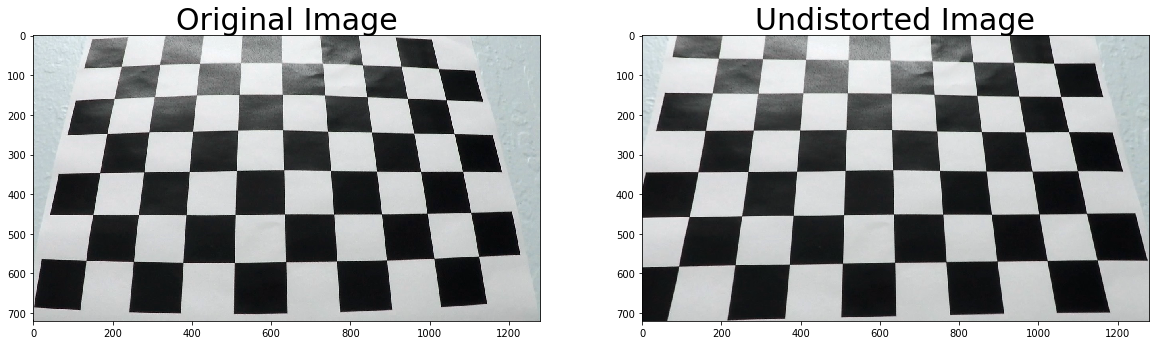

In [69]:
dst = cv2.undistort(img, dist_pickle['mtx'], dist_pickle['dist'], None, dist_pickle['mtx'])
cv2.imwrite('output_images/test_undist_3.jpg',dst)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(dst);
ax2.set_title('Undistorted Image', fontsize=30);

In [311]:
import pickle
import sys

def undistort_image(x_count, y_count, img, use_cache=True, image_dir='camera_cal/calibration*.jpg'):
    """
    Get the mtx and dist matrices that are used to undistort an image.
    Either load these from a saved cache, or calculate them if needed.
    
    x_count: number of inside corners in x direction (left to right)
    y_count: number of inside corners in y direction (top to bottom)
    image_dir: path where chess board images are located: 'camera_cal/*.jpg'
    img_size: can either be (width, height), or (height, width). Both appear to work
    img: distorted image to undistort
    
    Returns:
    undist: undistorted image
    """
    pickle_path = "camera_cal/camera_pickle.p"
    if use_cache:
        try:
            dist_pickle = pickle.load( open( pickle_path, "rb" ) )
            #print("using cached mtx, dst values to undistort image")
            return cv2.undistort(img, dist_pickle['mtx'], dist_pickle['dist'], None, dist_pickle['mtx'])
        except:
            print("error loading mtx and dst from cache, recalculating them...{}".format(sys.exc_info()))
    else:
        print("recalculating mtx and dst...")
        pass
    
    
    objp = np.zeros((x_count*y_count,3), np.float32)
    objp[:,:2] = np.mgrid[0:x_count, 0:y_count].T.reshape(-1,2)
    images = glob.glob(image_dir)
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img_tmp = cv2.imread(fname)
        gray = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (x_count,y_count), None)
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
        else:
            print("could not find corners for {}".format(fname))
            pass
    
    # Do camera calibration given object points and image points
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    
    if ret:
        dist_pickle = {}
        dist_pickle["mtx"] = mtx
        dist_pickle["dist"] = dist
        pickle.dump( dist_pickle, open( pickle_path, "wb" ) )
        return cv2.undistort(img, mtx, dist, None, mtx)
    else:
        print("could not calibrate camera")
        return None

recalculating mtx and dst...
could not find corners for camera_cal/calibration1.jpg
could not find corners for camera_cal/calibration4.jpg
could not find corners for camera_cal/calibration5.jpg


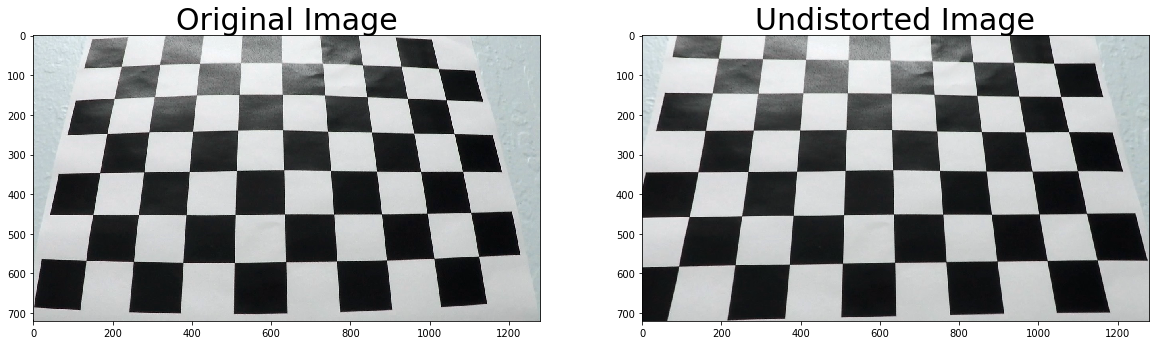

In [19]:
img = cv2.imread('camera_cal/calibration3.jpg')
dst = undistort_image(x_count=9,
                      y_count=6,
                      img=img,
                      use_cache=False,
                      image_dir='camera_cal/calibration*.jpg')
cv2.imwrite('camera_cal/test_undist_3.jpg',dst)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(dst);
ax2.set_title('Undistorted Image', fontsize=30);

using cached mtx, dst values to undistort image


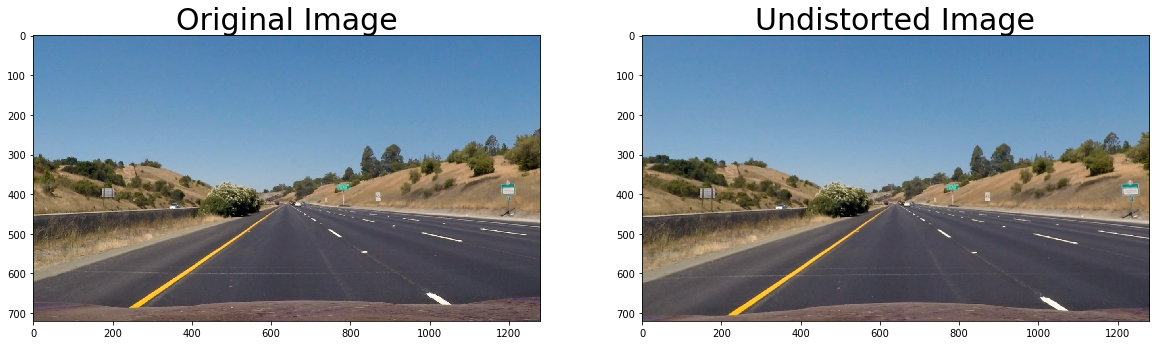

In [107]:
"""
undistort a road image
"""
import cv2
img = cv2.imread('test_images/straight_lines1.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')
cv2.imwrite('/output_images/road_undistorted.jpg',undist)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(undist);
ax2.set_title('Undistorted Image', fontsize=30);

## Binarize image

In [110]:
def abs_sobel_thresh(img, sobel_kernel=3, threshx=(50, 100),threshy=(50, 100)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    scaled_sobelx = np.uint8(255 * np.absolute(sobelx) / np.max(np.absolute(sobelx)))
    scaled_sobely = np.uint8(255 * np.absolute(sobely) / np.max(np.absolute(sobely)))
    grad_binaryx, grad_binaryy = np.zeros_like(scaled_sobelx), np.zeros_like(scaled_sobely)
    grad_binaryx[(scaled_sobelx >= threshx[0]) & (scaled_sobelx < threshx[1])] = 1
    grad_binaryy[(scaled_sobely >= threshy[0]) & (scaled_sobely < threshy[1])] = 1
    return grad_binaryx, grad_binaryy

def mag_thresh(image, sobel_kernel=3, mag_thresh=(80, 120)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    mag = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255 * mag / np.max(mag))
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/4)):
    """
    by default, I'll have it look for gradients that are between 0 and 45 degrees
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.abs(sobelx)
    abs_sobely = np.abs(sobely)
    theta = np.arctan2(abs_sobely, abs_sobelx)
    dir_binary = np.zeros_like(theta)
    dir_binary[(theta >= thresh[0]) & (theta < thresh[1])] = 1
    return dir_binary

using cached mtx, dst values to undistort image


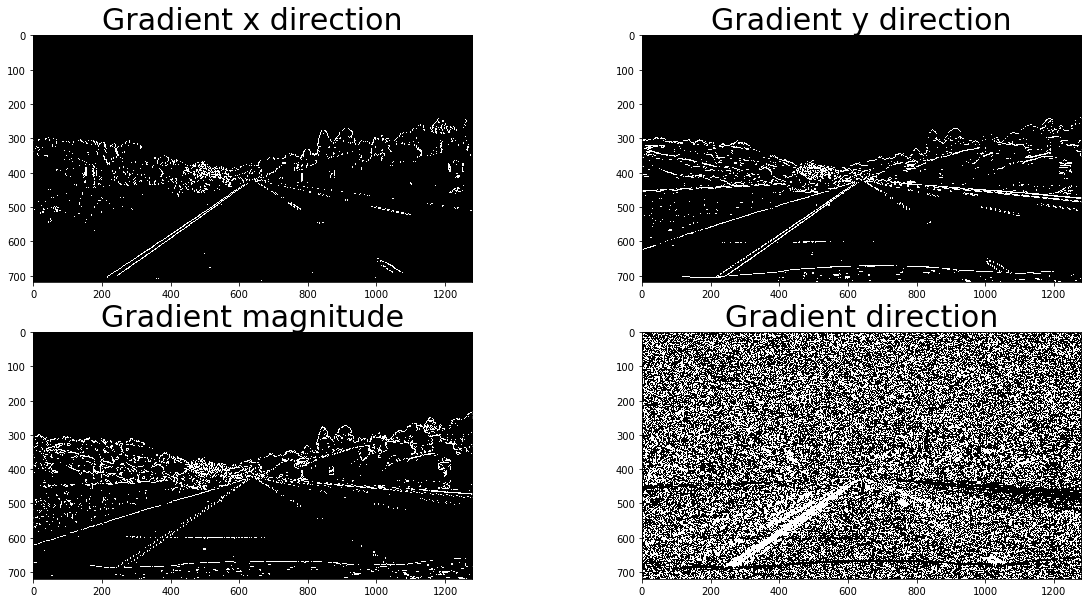

In [169]:
img = cv2.imread('test_images/straight_lines1.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')

# Choose a Sobel kernel size
ksize = 5# Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx, grady = abs_sobel_thresh(undist, sobel_kernel=ksize, threshx=(30, 120), threshy=(30,120))
mag_binary = mag_thresh(undist, sobel_kernel=ksize, mag_thresh=(30, 80))
dir_binary = dir_threshold(undist, sobel_kernel=15, thresh=(0.7, 1.3))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(gradx, cmap='gray');
ax1.set_title('Gradient x direction', fontsize=30);
ax2.imshow(grady, cmap='gray');
ax2.set_title('Gradient y direction', fontsize=30);
ax3.imshow(mag_binary, cmap='gray');
ax3.set_title('Gradient magnitude', fontsize=30);
ax4.imshow(dir_binary, cmap='gray');
ax4.set_title('Gradient direction', fontsize=30);

In [144]:
def red_thresh(img, thresh=(200,255)):
    """
    img: image is in RGB
    """
    r = img[:,:,0] #get red
    red_binary = np.zeros_like(r)
    red_binary[ (r >= thresh[0]) & (r < thresh[1])] = 1
    return red_binary

def saturation_thresh(img, thresh=(90,255)):
    """
    Assume img is RGB
    """
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s = hls[:,:,2]
    s_binary = np.zeros_like(s)
    s_binary[ (s >= thresh[0]) & (s < thresh[1]) ] = 1
    return s_binary

using cached mtx, dst values to undistort image


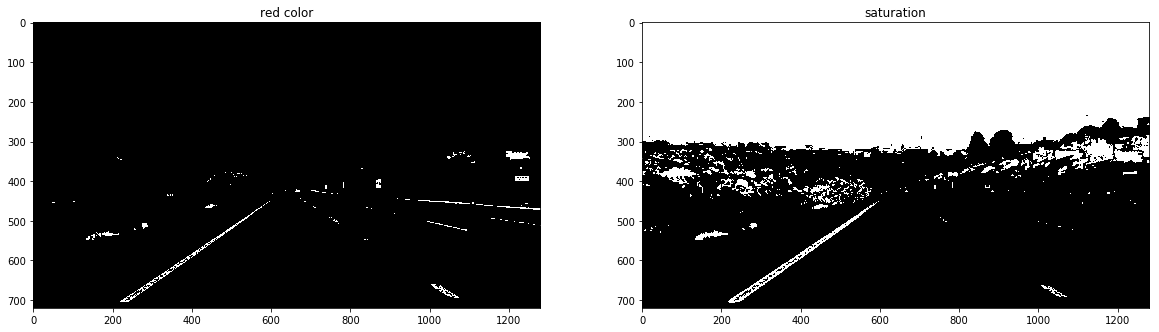

In [170]:
img = cv2.imread('test_images/straight_lines1.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')

red_binary = red_thresh(undist, thresh=(200,255))
s_binary = saturation_thresh(undist, thresh=(90,255))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(red_binary, cmap='gray');
ax1.set_title("red color");
ax2.imshow(s_binary, cmap = 'gray');
ax2.set_title("saturation");

using cached mtx, dst values to undistort image


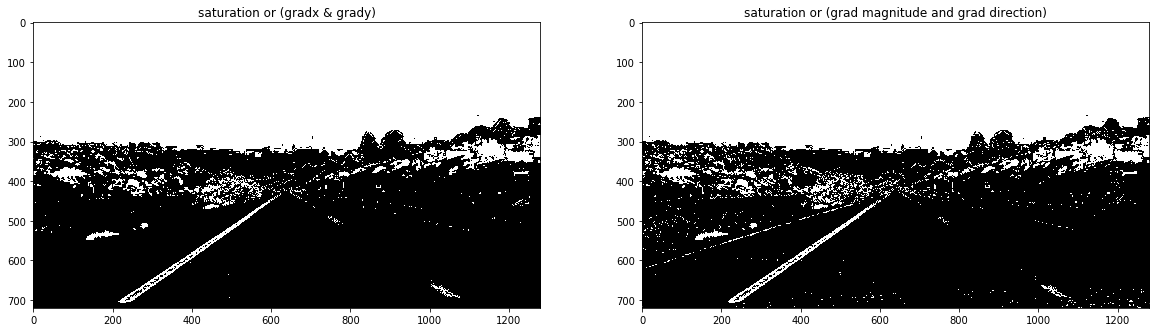

In [171]:
"""
Combine thresholds 

x threshold looks the cleanest of the gradient thresholds.
saturation is better than red
"""
img = cv2.imread('test_images/straight_lines1.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')


combo_binary1 = np.zeros_like(s_binary)
combo_binary1[ (s_binary == 1) | ((gradx == 1) & (grady == 1)) ] = 1

combo_binary2 = np.zeros_like(s_binary)
combo_binary2[ (s_binary == 1) | ((dir_binary == 1) & (mag_binary==1)) ] = 1

cv2.imwrite('/output_images/road_binarized.jpg',combo_binary1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));

ax1.imshow(combo_binary1, cmap='gray');
ax1.set_title("saturation or (gradx & grady)");
ax2.imshow(combo_binary2, cmap = 'gray');
ax2.set_title("saturation or (grad magnitude and grad direction)");

## Pespective transform

In [289]:
def transform_perspective(img, aerial=True):
    """
    img: input image that should already be undistorted
    aerial: True to convert normal image to aerial view, False to convert aerial view to normal view
    """
    h, w = img.shape[0:2] #dim 0 is height, dim 1 is width
    img_size = (w, h) #flip order so that 0th dim is x axis (left/right), 1st dim is y axis (up/down)
    #points are (width, height)
    src_points = None
    dst_points = None
    normal_points = np.float32(
        [[(w / 2) - 60, h / 2 + 100], #top left
        [((w / 6) - 10), h], #bottom left
        [(w * 5 / 6) + 60, h], #bottom right
        [(w / 2 + 60), h / 2 + 100]]) #top right
    
    aerial_points = np.float32(
        [[(w / 4), 5], #top left
        [(w / 4), h-5], #bottom left
        [(w * 3 / 4), h-5], #bottom right
        [(w * 3 / 4), 5]]) #top right

    if aerial:
        src_points = normal_points
        dst_points = aerial_points
    else:
        src_points = aerial_points
        dst_points = normal_points
        
    M = cv2.getPerspectiveTransform(src_points, dst_points)

    #notice that for warpPerspective, the image size should be (width, height), or (x, y)
    warped = cv2.warpPerspective(img, M, img_size)

    return warped, M, src_points, dst_points

using cached mtx, dst values to undistort image


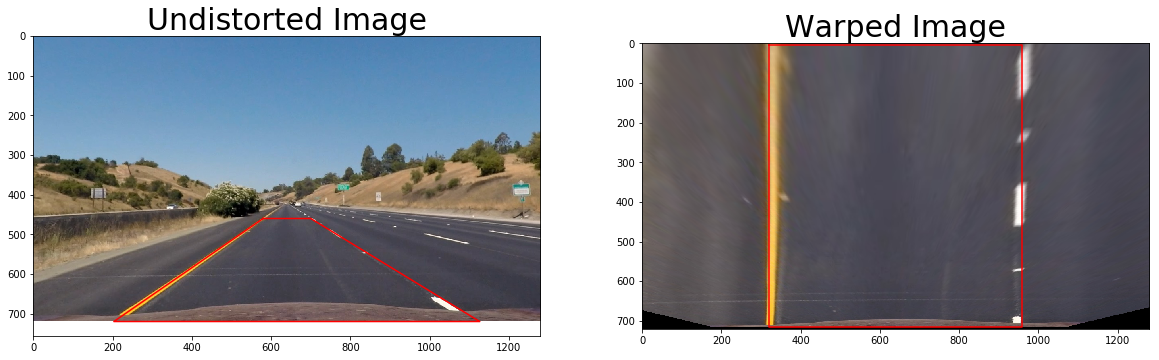

In [290]:
img = cv2.imread('test_images/straight_lines1.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')

warped, M, src_points, dst_points = transform_perspective(undist)
cv2.imwrite('/output_images/road_warped.jpg',warped)
# Visualize perspective transform
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(dst);
ax1.plot([src_points[0,0],src_points[1,0],src_points[2,0],src_points[3,0],src_points[0,0]],
         [src_points[0,1],src_points[1,1],src_points[2,1],src_points[3,1],src_points[0,1]], color='red');
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(warped);
ax2.set_title('Warped Image', fontsize=30);
ax2.plot([dst_points[0,0],dst_points[1,0],dst_points[2,0],dst_points[3,0],dst_points[0,0]],
         [dst_points[0,1],dst_points[1,1],dst_points[2,1],dst_points[3,1],dst_points[0,1]], color='red');

using cached mtx, dst values to undistort image


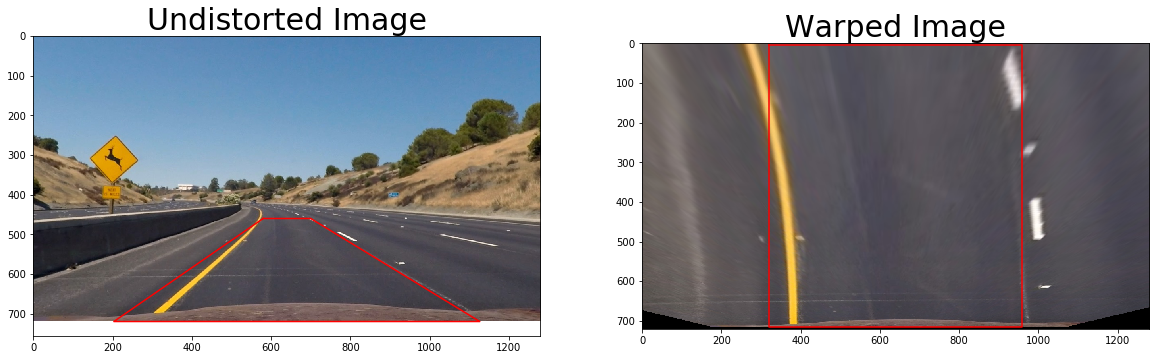

In [291]:
"""
Try the same perspective transform on a curved road
"""
img = cv2.imread('test_images/test2.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')

warped, M, src_points, dst_points = transform_perspective(undist)
cv2.imwrite('/output_images/road_curved_warped.jpg',warped)
# Visualize perspective transform
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(undist);
ax1.plot([src_points[0,0],src_points[1,0],src_points[2,0],src_points[3,0],src_points[0,0]],
         [src_points[0,1],src_points[1,1],src_points[2,1],src_points[3,1],src_points[0,1]], color='red');
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(warped);
ax2.set_title('Warped Image', fontsize=30);
ax2.plot([dst_points[0,0],dst_points[1,0],dst_points[2,0],dst_points[3,0],dst_points[0,0]],
         [dst_points[0,1],dst_points[1,1],dst_points[2,1],dst_points[3,1],dst_points[0,1]], color='red');

## Undistort, Threshold, and Perspective Transform

using cached mtx, dst values to undistort image


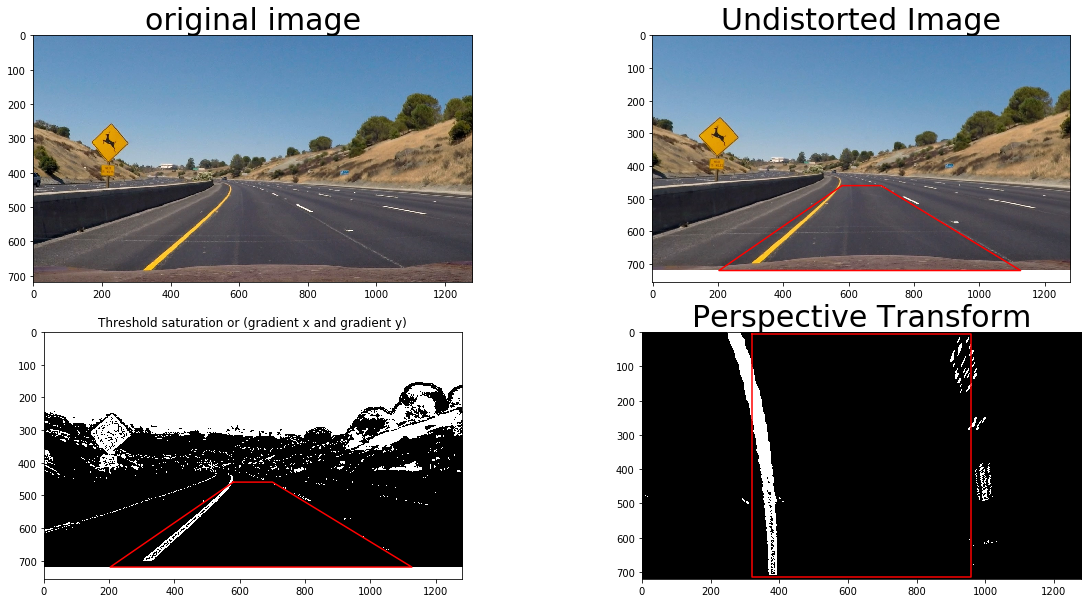

In [292]:
img = cv2.imread('test_images/test2.jpg') #reads as BGR
img = img[:,:,::-1] #convert to RGB
undist = undistort_image(x_count=9,y_count=6,img=img,use_cache=True,image_dir='camera_cal/*.jpg')

gradx, grady = abs_sobel_thresh(undist, sobel_kernel=ksize, threshx=(30, 120), threshy=(30,120))
s_binary = saturation_thresh(undist, thresh=(90,255))
combo_binary = np.zeros_like(s_binary)
combo_binary[ (s_binary == 1) | ((gradx == 1) & (grady == 1)) ] = 1

warped, M, src_points, dst_points = transform_perspective(combo_binary)
cv2.imwrite('/output_images/road_curved_binarized.jpg',combo_binary)
cv2.imwrite('/output_images/road_curved_binarized_warped.jpg',warped)

# Visualize perspective transform
f, ((ax1, ax2), (ax3,ax4))= plt.subplots(2, 2, figsize=(20,10));

ax1.imshow(img);
ax1.set_title("original image", fontsize=30);

ax2.imshow(undist);
ax2.plot([src_points[0,0],src_points[1,0],src_points[2,0],src_points[3,0],src_points[0,0]],
         [src_points[0,1],src_points[1,1],src_points[2,1],src_points[3,1],src_points[0,1]], color='red');
ax2.set_title('Undistorted Image', fontsize=30);

ax3.imshow(combo_binary, cmap='gray');
ax3.plot([src_points[0,0],src_points[1,0],src_points[2,0],src_points[3,0],src_points[0,0]],
         [src_points[0,1],src_points[1,1],src_points[2,1],src_points[3,1],src_points[0,1]], color='red');

ax3.set_title("Threshold saturation or (gradient x and gradient y)");

ax4.imshow(warped, cmap='gray');
ax4.set_title('Perspective Transform', fontsize=30);
ax4.plot([dst_points[0,0],dst_points[1,0],dst_points[2,0],dst_points[3,0],dst_points[0,0]],
         [dst_points[0,1],dst_points[1,1],dst_points[2,1],dst_points[3,1],dst_points[0,1]], color='red');

## Find Lane Lines

In [302]:
def lane_line(img, nwindows=9, margin=100, minpix = 50, visualize=True, unwarp=True, undist=None, M=None):
    """
    img: should be a binary (thresholded) image that is warped to show an aerial view
    nwindows: numer of sliding windows, stacked horizontally, to use when searching for lane lines
    margin: the width of the windows +/- margin
    minpix: minimum number of pixels found to recenter window
    undist: color image (3 channels) after undistortion, before warping perpsective or thresholding
    """
    mid_height = np.int(img.shape[0] / 2)
    bottom_half = img[mid_height:,:]
    """
    #choose axis 0. the image's 0th dimension is height,
    so the outer nesting is for an entire row with multiple columns.
    Summing along axis 0 means sum all rows for each column
    """
    histogram = np.sum(bottom_half, axis=0) #histogram is 1D and same as width of image
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((img, img, img))*255 #the shape is height (720) x width (1280) x 3 copies of img

    """
    Find the peak of the left and right halves of the histogram
    These will be the starting point for the left and right lines
    """
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    
    """
    Identify the x and y positions of all nonzero pixels in the image
    nonzeroy has 1 element for each pixel in the image where the pixel
    is nonzero.  So, for instance, out of (270 * 1280) = 345,600 total pixels,
    28,357 (len(nonzeroy)) of those have non-zero values.  nonzeroy has the y coordinate of each of those nonzero pixels.
    Similarly, nonzerox has the x coordinates of each of those nonzero pixels.
    The nonzeroy and nonzerox are ordered so that nonzeroy[10] and nonzeroy[10] represent the y and x coordinates
    of a pixel that has a nonzero value.
    """
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0]) 
    nonzerox = np.array(nonzero[1])
    
    """
    Loop through all windows
    """
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base


    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    
    img_height = binary_warped.shape[0]

    #before loop, copy some shape values to local vars for easier reading
    img_height = binary_warped.shape[0]
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_high = img_height - window*window_height #this is the bottom of the window
        win_y_low = win_y_high - window_height #this is the top of the window
        
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        """
        # Draw the windows on the visualization image
        # two diagonal corners are given to define the rectangle:
        #top left corner, bottom right corner (of the left lane's window)
        #same for the right lane's window
        """
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        """
        Identify the nonzero pixels in x and y within the window.
        Recall that nonzeroy's values represent the y coordinates of pixels 
        that have nonzero values in the image.
        We're using the inequalities to find pixels for which the 
        y coordinates and x coordinates are within the window.
        
        The inequalities give us 1 for true and 0 for false.  
        We apply nonzero to find the indices for nonzeroy and nonzerox for which 
        the x,y coordinates are both nonzero pixels and are within the window boundaries.
        These indices are saved for the left lane and right lane.
        """
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    #end for loop
    
    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    """
    Extract left and right line pixel positions
    These give us the x, y coordinates of the pixels
    that are nonzero in the image, and are also within the 
    search windows.
    """
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    """
    Fit a second order polynomial to each
    Notice that the y axis is our independent variable,
    since the lane lines are close to vertical, and so there 
    are more than one y value for the same x value.
    We're fitting a second order polynomial, so the coefficients
    will be used like this:
    x = left_fit[0] * y**2 + left_fit[1] * y + left_fit[2]
    """
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    """
    numpy.linspace(start, stop, num=50...)
    """
    ploty = np.linspace(0, img_height - 1, img_height )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    if unwarp:
        Minv = np.linalg.inv(M)
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(img).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
        # Combine the result with the original image
        out_img = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
        if visualize:
            plt.imshow(out_img)
    else: #keep in aerial view
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        if visualize:
            plt.imshow(out_img)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
    
    return out_img, leftx, rightx, left_fit, right_fit

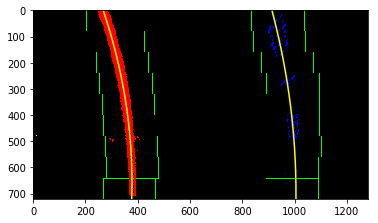

In [307]:
img_lanes, leftx, rightx, left_fit, right_fit = lane_line(img=warped, nwindows=9, margin=100, minpix = 50, visualize=True, unwarp=False,M=M)

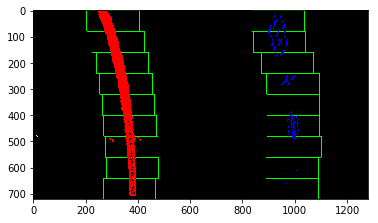

In [308]:
plt.imshow(img_lanes)

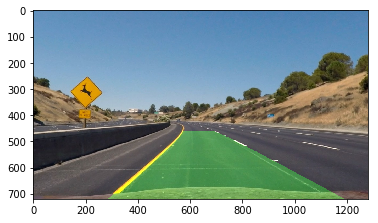

In [305]:
#unwarp image
img_lanes, leftx, rightx, left_fit, right_fit = lane_line(img=warped,
                                                          nwindows=9, 
                                                          margin=100, 
                                                          minpix = 50, 
                                                          visualize=True, 
                                                          unwarp=True,
                                                          undist=undist,
                                                          M=M)

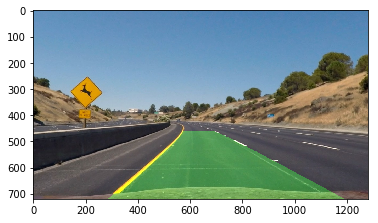

In [306]:
plt.imshow(img_lanes)

In [259]:
def lane_line_given_polynomial(img, left_fit, right_fit, visualize=True):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    
    left_fit_left_bound  = left_fit[0] * (nonzeroy**2) + left_fit[1] * nonzeroy + left_fit[2] - margin
    left_fit_right_bound = left_fit[0] * (nonzeroy**2) + left_fit[1] * nonzeroy + left_fit[2] + margin
    left_lane_inds = ((nonzerox > left_fit_left_bound) & (nonzerox < left_fit_right_bound)) 
    
    right_fit_left_bound =  right_fit[0] * (nonzeroy**2) + right_fit[1] * nonzeroy + right_fit[2] - margin
    right_fit_right_bound = right_fit[0] * (nonzeroy**2) + right_fit[1] * nonzeroy + right_fit[2] + margin
    right_lane_inds = ((nonzerox > right_fit_left_bound) & (nonzerox < right_fit_right_bound))

    # extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    if visualize:
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
    return out_img, leftx, rightx, lefty, righty, left_fit, right_fit

In [ ]:
plt.ims

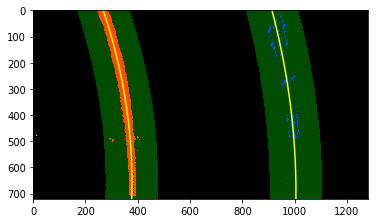

In [260]:
img_lanes, leftx, rightx, lefty, righty, left_fit, right_fit = lane_line_given_polynomial(img=warped, left_fit=left_fit, right_fit=right_fit, visualize=True)

## Curvature

In [275]:
def curvature(img_height, leftx, rightx, lefty, righty, left_fit, right_fit, ym_per_pix = 30/720, xm_per_pix = 3.7/1280):
    """
    # Define conversions in x and y from pixels space to meters
    ym_per_pix: meters per pixel in y dimension
    xm_per_pix: meters per pixel in x dimension
    """
    y_eval = img_height
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    return left_curverad, right_curverad

In [276]:
img_height, img_width = warped.shape
lane_length_m = 30.
lane_width_m = 3.7

ym_per_pix = lane_length_m / img_height
xm_per_pix = lane_width_m / img_width

left_curverad, right_curverad = curvature(img_height=warped.shape[0],
                                          leftx=leftx,
                                          rightx=rightx,
                                          lefty=lefty,
                                          righty=righty,
                                          left_fit=left_fit,
                                          right_fit=right_fit,
                                          ym_per_pix=30/720,
                                          xm_per_pix = 3.7/700)

1545.07721868 m 1026.50835536 m


## Offset from center

In [282]:
def offset_from_center(img, left_fit, right_fit):
    #find the x coordinate of the left and right lanes at the bottom of the image, closest to the car
    y_base = img.shape[0]
    leftx_base = y_base * left_fit[0]**2 + y_base * left_fit[1] + left_fit[2]
    rightx_base = y_base * right_fit[0]**2 + y_base * right_fit[1] + right_fit[2]
    lane_center = np.mean([leftx_base, rightx_base])
    car_position_x = img.shape[1] / 2.
    offset = car_position_x - lane_center
    #print("lane left x {}, lane right x {}, lane center {}, car position {}, offset {}".format(leftx_base,
    #                                                                                           rightx_base,
    #                                                                                           lane_center,
    #                                                                                           car_position_x, offset))
    return offset

In [283]:
offset = offset_from_center(warped, left_fit,right_fit)
offset

-166.2826909943908

## unwarp image

In [295]:
left_fit

array([ -2.55192674e-04,   3.34800745e-01,   2.68421703e+02])

In [293]:
Minv = np.linalg.inv(M)

In [ ]:

"""

"""
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)

## Class Line

In [284]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

## Apply to Video

In [285]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [309]:
def process_image(img):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    #undistort image
    undist = undistort_image(x_count=9,
                             y_count=6,
                             img=img)
    
    #threshold to create binary image
    gradx, grady = abs_sobel_thresh(undist, sobel_kernel=ksize, threshx=(30, 120), threshy=(30,120))
    s_binary = saturation_thresh(undist, thresh=(90,255))
    combo_binary = np.zeros_like(s_binary)
    combo_binary[ (s_binary == 1) | ((gradx == 1) & (grady == 1)) ] = 1

    #warp perspective to an aerial view
    warped, M, src_points, dst_points = transform_perspective(combo_binary)

    #find lane lines, draw found lanes, unwarp perspective back to normal view
    img_lanes, leftx, rightx, left_fit, right_fit = lane_line(img=warped,
                                                          nwindows=9, 
                                                          margin=100, 
                                                          minpix = 50, 
                                                          visualize=True, 
                                                          unwarp=True,
                                                          undist=undist,
                                                          M=M)
    
    return img_lanes

using cached mtx, dst values to undistort image
[MoviePy] >>>> Building video output_video/project_video_out.mp4
[MoviePy] Writing video output_video/project_video_out.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

using cached mtx, dst values to undistort image


  0%|          | 1/1261 [00:00<06:05,  3.45it/s]

using cached mtx, dst values to undistort image


  0%|          | 2/1261 [00:00<06:00,  3.49it/s]

using cached mtx, dst values to undistort image


  0%|          | 3/1261 [00:00<05:56,  3.53it/s]

using cached mtx, dst values to undistort image


  0%|          | 4/1261 [00:01<06:01,  3.47it/s]

using cached mtx, dst values to undistort image


  0%|          | 5/1261 [00:01<06:24,  3.27it/s]

using cached mtx, dst values to undistort image


  0%|          | 6/1261 [00:01<06:17,  3.32it/s]

using cached mtx, dst values to undistort image


  1%|          | 7/1261 [00:02<06:21,  3.29it/s]

using cached mtx, dst values to undistort image


  1%|          | 8/1261 [00:02<06:16,  3.33it/s]

using cached mtx, dst values to undistort image


  1%|          | 9/1261 [00:02<06:10,  3.38it/s]

using cached mtx, dst values to undistort image


  1%|          | 10/1261 [00:02<06:08,  3.40it/s]

using cached mtx, dst values to undistort image


  1%|          | 11/1261 [00:03<06:00,  3.47it/s]

using cached mtx, dst values to undistort image


  1%|          | 12/1261 [00:03<06:02,  3.44it/s]

using cached mtx, dst values to undistort image


  1%|          | 13/1261 [00:03<05:56,  3.50it/s]

using cached mtx, dst values to undistort image


  1%|          | 14/1261 [00:04<05:58,  3.48it/s]

using cached mtx, dst values to undistort image


  1%|          | 15/1261 [00:04<05:59,  3.47it/s]

using cached mtx, dst values to undistort image


  1%|▏         | 16/1261 [00:04<06:02,  3.43it/s]

using cached mtx, dst values to undistort image


  1%|▏         | 17/1261 [00:05<06:14,  3.32it/s]

using cached mtx, dst values to undistort image


  1%|▏         | 18/1261 [00:05<06:32,  3.17it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 19/1261 [00:05<06:47,  3.05it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 20/1261 [00:06<06:55,  2.99it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 21/1261 [00:06<06:50,  3.02it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 22/1261 [00:06<06:33,  3.15it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 23/1261 [00:06<06:10,  3.34it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 24/1261 [00:07<05:54,  3.49it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 25/1261 [00:07<05:58,  3.45it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 26/1261 [00:07<05:52,  3.50it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 27/1261 [00:08<06:10,  3.33it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 28/1261 [00:08<06:12,  3.31it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 29/1261 [00:08<06:08,  3.35it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 30/1261 [00:08<06:09,  3.33it/s]

using cached mtx, dst values to undistort image


  2%|▏         | 31/1261 [00:09<06:04,  3.38it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 32/1261 [00:09<05:52,  3.49it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 33/1261 [00:09<05:46,  3.54it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 34/1261 [00:10<06:01,  3.39it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 35/1261 [00:10<06:14,  3.28it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 36/1261 [00:10<06:37,  3.08it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 37/1261 [00:11<08:48,  2.32it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 38/1261 [00:12<09:54,  2.06it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 39/1261 [00:12<09:44,  2.09it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 40/1261 [00:13<09:47,  2.08it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 41/1261 [00:13<09:05,  2.24it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 42/1261 [00:13<08:34,  2.37it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 43/1261 [00:14<09:04,  2.24it/s]

using cached mtx, dst values to undistort image


  3%|▎         | 44/1261 [00:14<08:46,  2.31it/s]

using cached mtx, dst values to undistort image


  4%|▎         | 45/1261 [00:15<08:25,  2.41it/s]

using cached mtx, dst values to undistort image


  4%|▎         | 46/1261 [00:15<08:42,  2.33it/s]

using cached mtx, dst values to undistort image


  4%|▎         | 47/1261 [00:15<08:40,  2.33it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 48/1261 [00:16<08:21,  2.42it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 49/1261 [00:16<08:59,  2.25it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 50/1261 [00:17<08:54,  2.27it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 51/1261 [00:17<08:54,  2.26it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 52/1261 [00:18<08:29,  2.37it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 53/1261 [00:18<07:59,  2.52it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 54/1261 [00:18<08:00,  2.51it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 55/1261 [00:19<08:11,  2.46it/s]

using cached mtx, dst values to undistort image


  4%|▍         | 56/1261 [00:19<07:55,  2.54it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 57/1261 [00:20<07:47,  2.57it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 58/1261 [00:20<07:38,  2.62it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 59/1261 [00:20<07:17,  2.75it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 60/1261 [00:21<07:42,  2.59it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 61/1261 [00:21<07:16,  2.75it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 62/1261 [00:21<07:02,  2.84it/s]

using cached mtx, dst values to undistort image


  5%|▍         | 63/1261 [00:22<07:11,  2.77it/s]

using cached mtx, dst values to undistort image


  5%|▌         | 64/1261 [00:22<07:13,  2.76it/s]

using cached mtx, dst values to undistort image


  5%|▌         | 65/1261 [00:22<06:44,  2.96it/s]

using cached mtx, dst values to undistort image


  5%|▌         | 66/1261 [00:23<06:37,  3.01it/s]

using cached mtx, dst values to undistort image


  5%|▌         | 67/1261 [00:23<06:30,  3.06it/s]

using cached mtx, dst values to undistort image


  5%|▌         | 68/1261 [00:23<06:36,  3.01it/s]

using cached mtx, dst values to undistort image


  5%|▌         | 69/1261 [00:24<06:21,  3.13it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 70/1261 [00:24<06:09,  3.22it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 71/1261 [00:24<06:04,  3.27it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 72/1261 [00:24<05:55,  3.34it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 73/1261 [00:25<06:02,  3.27it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 74/1261 [00:25<06:21,  3.11it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 75/1261 [00:26<06:40,  2.96it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 76/1261 [00:26<07:02,  2.81it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 77/1261 [00:26<06:57,  2.84it/s]

using cached mtx, dst values to undistort image


  6%|▌         | 78/1261 [00:27<06:46,  2.91it/s]

using cached mtx, dst values to undistort image


  6%|▋         | 79/1261 [00:27<06:30,  3.03it/s]

using cached mtx, dst values to undistort image


  6%|▋         | 80/1261 [00:27<06:33,  3.00it/s]

using cached mtx, dst values to undistort image


  6%|▋         | 81/1261 [00:28<06:36,  2.97it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 82/1261 [00:28<06:38,  2.96it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 83/1261 [00:28<06:50,  2.87it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 84/1261 [00:29<07:00,  2.80it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 85/1261 [00:29<06:36,  2.97it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 86/1261 [00:29<06:27,  3.03it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 87/1261 [00:30<06:04,  3.22it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 88/1261 [00:30<06:08,  3.18it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 89/1261 [00:30<06:42,  2.91it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 90/1261 [00:31<07:23,  2.64it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 91/1261 [00:31<07:30,  2.60it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 92/1261 [00:32<07:30,  2.60it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 93/1261 [00:32<07:06,  2.74it/s]

using cached mtx, dst values to undistort image


  7%|▋         | 94/1261 [00:32<07:02,  2.76it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 95/1261 [00:33<06:47,  2.86it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 96/1261 [00:33<07:40,  2.53it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 97/1261 [00:33<07:29,  2.59it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 98/1261 [00:34<07:11,  2.69it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 99/1261 [00:34<06:51,  2.83it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 100/1261 [00:34<06:36,  2.93it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 101/1261 [00:35<07:35,  2.55it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 102/1261 [00:35<07:13,  2.68it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 103/1261 [00:36<07:11,  2.69it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 104/1261 [00:36<07:06,  2.71it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 105/1261 [00:36<06:59,  2.76it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 106/1261 [00:37<06:44,  2.85it/s]

using cached mtx, dst values to undistort image


  8%|▊         | 107/1261 [00:37<06:32,  2.94it/s]

using cached mtx, dst values to undistort image


  9%|▊         | 108/1261 [00:37<06:19,  3.04it/s]

using cached mtx, dst values to undistort image


  9%|▊         | 109/1261 [00:37<06:02,  3.18it/s]

using cached mtx, dst values to undistort image


  9%|▊         | 110/1261 [00:38<05:57,  3.22it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 111/1261 [00:38<05:50,  3.28it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 112/1261 [00:38<05:48,  3.30it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 113/1261 [00:39<05:53,  3.25it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 114/1261 [00:39<05:50,  3.27it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 115/1261 [00:39<05:44,  3.33it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 116/1261 [00:40<05:54,  3.23it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 117/1261 [00:40<05:47,  3.29it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 118/1261 [00:40<05:51,  3.25it/s]

using cached mtx, dst values to undistort image


  9%|▉         | 119/1261 [00:41<05:46,  3.30it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 120/1261 [00:41<05:43,  3.32it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 121/1261 [00:41<05:46,  3.29it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 122/1261 [00:41<05:34,  3.41it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 123/1261 [00:42<05:37,  3.37it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 124/1261 [00:42<05:40,  3.34it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 125/1261 [00:42<05:47,  3.27it/s]

using cached mtx, dst values to undistort image


 10%|▉         | 126/1261 [00:43<05:43,  3.31it/s]

using cached mtx, dst values to undistort image


 10%|█         | 127/1261 [00:43<05:39,  3.34it/s]

using cached mtx, dst values to undistort image


 10%|█         | 128/1261 [00:43<05:39,  3.34it/s]

using cached mtx, dst values to undistort image


 10%|█         | 129/1261 [00:43<05:31,  3.41it/s]

using cached mtx, dst values to undistort image


 10%|█         | 130/1261 [00:44<05:38,  3.34it/s]

using cached mtx, dst values to undistort image


 10%|█         | 131/1261 [00:44<05:56,  3.17it/s]

using cached mtx, dst values to undistort image


 10%|█         | 132/1261 [00:45<06:16,  3.00it/s]

using cached mtx, dst values to undistort image


 11%|█         | 133/1261 [00:45<05:57,  3.15it/s]

using cached mtx, dst values to undistort image


 11%|█         | 134/1261 [00:45<06:02,  3.11it/s]

using cached mtx, dst values to undistort image


 11%|█         | 135/1261 [00:45<05:59,  3.13it/s]

using cached mtx, dst values to undistort image


 11%|█         | 136/1261 [00:46<06:06,  3.07it/s]

using cached mtx, dst values to undistort image


 11%|█         | 137/1261 [00:46<06:00,  3.12it/s]

using cached mtx, dst values to undistort image


 11%|█         | 138/1261 [00:46<06:00,  3.12it/s]

using cached mtx, dst values to undistort image


 11%|█         | 139/1261 [00:47<05:47,  3.23it/s]

using cached mtx, dst values to undistort image


 11%|█         | 140/1261 [00:47<05:45,  3.25it/s]

using cached mtx, dst values to undistort image


 11%|█         | 141/1261 [00:47<05:40,  3.29it/s]

using cached mtx, dst values to undistort image


 11%|█▏        | 142/1261 [00:48<05:42,  3.27it/s]

using cached mtx, dst values to undistort image


 11%|█▏        | 143/1261 [00:48<05:54,  3.15it/s]

using cached mtx, dst values to undistort image


 11%|█▏        | 144/1261 [00:48<05:44,  3.24it/s]

using cached mtx, dst values to undistort image


 11%|█▏        | 145/1261 [00:49<05:36,  3.32it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 146/1261 [00:49<05:34,  3.33it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 147/1261 [00:49<05:29,  3.38it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 148/1261 [00:49<05:22,  3.46it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 149/1261 [00:50<05:21,  3.46it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 150/1261 [00:50<05:15,  3.52it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 151/1261 [00:50<05:10,  3.57it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 152/1261 [00:51<05:14,  3.53it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 153/1261 [00:51<05:10,  3.56it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 154/1261 [00:51<05:12,  3.54it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 155/1261 [00:51<05:23,  3.42it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 156/1261 [00:52<05:43,  3.21it/s]

using cached mtx, dst values to undistort image


 12%|█▏        | 157/1261 [00:52<05:55,  3.10it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 158/1261 [00:52<06:00,  3.06it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 159/1261 [00:53<06:08,  2.99it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 160/1261 [00:53<05:48,  3.16it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 161/1261 [00:53<05:36,  3.27it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 162/1261 [00:54<05:35,  3.28it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 163/1261 [00:54<05:26,  3.36it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 164/1261 [00:54<05:35,  3.27it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 165/1261 [00:55<05:51,  3.12it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 166/1261 [00:55<05:51,  3.11it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 167/1261 [00:55<05:44,  3.17it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 168/1261 [00:56<05:37,  3.24it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 169/1261 [00:56<05:48,  3.13it/s]

using cached mtx, dst values to undistort image


 13%|█▎        | 170/1261 [00:56<05:49,  3.12it/s]

using cached mtx, dst values to undistort image


 14%|█▎        | 171/1261 [00:56<05:43,  3.17it/s]

using cached mtx, dst values to undistort image


 14%|█▎        | 172/1261 [00:57<05:38,  3.22it/s]

using cached mtx, dst values to undistort image


 14%|█▎        | 173/1261 [00:57<05:40,  3.19it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 174/1261 [00:57<05:41,  3.19it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 175/1261 [00:58<05:35,  3.24it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 176/1261 [00:58<05:26,  3.32it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 177/1261 [00:58<05:48,  3.11it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 178/1261 [00:59<05:55,  3.05it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 179/1261 [00:59<05:43,  3.15it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 180/1261 [00:59<05:41,  3.17it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 181/1261 [01:00<05:37,  3.20it/s]

using cached mtx, dst values to undistort image


 14%|█▍        | 182/1261 [01:00<05:34,  3.23it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 183/1261 [01:00<05:41,  3.15it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 184/1261 [01:01<05:42,  3.14it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 185/1261 [01:01<05:43,  3.13it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 186/1261 [01:01<05:41,  3.15it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 187/1261 [01:02<05:52,  3.04it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 188/1261 [01:02<05:56,  3.01it/s]

using cached mtx, dst values to undistort image


 15%|█▍        | 189/1261 [01:02<05:52,  3.04it/s]

using cached mtx, dst values to undistort image


 15%|█▌        | 190/1261 [01:03<05:50,  3.06it/s]

using cached mtx, dst values to undistort image


 15%|█▌        | 191/1261 [01:03<05:31,  3.23it/s]

using cached mtx, dst values to undistort image


 15%|█▌        | 192/1261 [01:03<05:21,  3.33it/s]

using cached mtx, dst values to undistort image


 15%|█▌        | 193/1261 [01:03<05:32,  3.21it/s]

using cached mtx, dst values to undistort image


 15%|█▌        | 194/1261 [01:04<05:31,  3.22it/s]

using cached mtx, dst values to undistort image


 15%|█▌        | 195/1261 [01:04<05:32,  3.20it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 196/1261 [01:04<05:25,  3.28it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 197/1261 [01:05<05:22,  3.30it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 198/1261 [01:05<05:30,  3.22it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 199/1261 [01:05<05:28,  3.23it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 200/1261 [01:06<05:16,  3.36it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 201/1261 [01:06<05:10,  3.41it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 202/1261 [01:06<05:21,  3.30it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 203/1261 [01:06<05:14,  3.37it/s]

using cached mtx, dst values to undistort image


 16%|█▌        | 204/1261 [01:07<05:28,  3.22it/s]

using cached mtx, dst values to undistort image


 16%|█▋        | 205/1261 [01:07<05:36,  3.14it/s]

using cached mtx, dst values to undistort image


 16%|█▋        | 206/1261 [01:07<05:33,  3.16it/s]

using cached mtx, dst values to undistort image


 16%|█▋        | 207/1261 [01:08<05:25,  3.24it/s]

using cached mtx, dst values to undistort image


 16%|█▋        | 208/1261 [01:08<05:23,  3.26it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 209/1261 [01:08<05:18,  3.31it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 210/1261 [01:09<05:26,  3.22it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 211/1261 [01:09<05:21,  3.26it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 212/1261 [01:09<05:13,  3.34it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 213/1261 [01:10<05:13,  3.34it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 214/1261 [01:10<05:05,  3.43it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 215/1261 [01:10<05:08,  3.39it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 216/1261 [01:10<05:10,  3.36it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 217/1261 [01:11<05:10,  3.37it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 218/1261 [01:11<05:28,  3.18it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 219/1261 [01:12<06:21,  2.73it/s]

using cached mtx, dst values to undistort image


 17%|█▋        | 220/1261 [01:12<06:30,  2.66it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 221/1261 [01:12<06:53,  2.52it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 222/1261 [01:13<06:43,  2.58it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 223/1261 [01:13<06:34,  2.63it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 224/1261 [01:13<06:30,  2.65it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 225/1261 [01:14<06:20,  2.72it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 226/1261 [01:14<06:16,  2.75it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 227/1261 [01:15<06:07,  2.82it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 228/1261 [01:15<06:11,  2.78it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 229/1261 [01:15<06:00,  2.86it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 230/1261 [01:16<05:41,  3.02it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 231/1261 [01:16<05:31,  3.11it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 232/1261 [01:16<05:18,  3.23it/s]

using cached mtx, dst values to undistort image


 18%|█▊        | 233/1261 [01:16<05:29,  3.12it/s]

using cached mtx, dst values to undistort image


 19%|█▊        | 234/1261 [01:17<05:38,  3.03it/s]

using cached mtx, dst values to undistort image


 19%|█▊        | 235/1261 [01:17<05:32,  3.09it/s]

using cached mtx, dst values to undistort image


 19%|█▊        | 236/1261 [01:17<05:23,  3.17it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 237/1261 [01:18<05:16,  3.23it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 238/1261 [01:18<05:39,  3.02it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 239/1261 [01:18<05:47,  2.94it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 240/1261 [01:19<05:38,  3.02it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 241/1261 [01:19<05:34,  3.05it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 242/1261 [01:19<05:27,  3.12it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 243/1261 [01:20<05:25,  3.13it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 244/1261 [01:20<05:19,  3.19it/s]

using cached mtx, dst values to undistort image


 19%|█▉        | 245/1261 [01:20<05:23,  3.14it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 246/1261 [01:21<05:19,  3.18it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 247/1261 [01:21<05:12,  3.25it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 248/1261 [01:21<05:09,  3.28it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 249/1261 [01:21<05:00,  3.37it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 250/1261 [01:22<05:22,  3.14it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 251/1261 [01:22<05:11,  3.25it/s]

using cached mtx, dst values to undistort image


 20%|█▉        | 252/1261 [01:22<05:10,  3.25it/s]

using cached mtx, dst values to undistort image


 20%|██        | 253/1261 [01:23<05:13,  3.21it/s]

using cached mtx, dst values to undistort image


 20%|██        | 254/1261 [01:23<05:14,  3.20it/s]

using cached mtx, dst values to undistort image


 20%|██        | 255/1261 [01:23<05:07,  3.27it/s]

using cached mtx, dst values to undistort image


 20%|██        | 256/1261 [01:24<05:05,  3.29it/s]

using cached mtx, dst values to undistort image


 20%|██        | 257/1261 [01:24<05:06,  3.27it/s]

using cached mtx, dst values to undistort image


 20%|██        | 258/1261 [01:24<05:09,  3.24it/s]

using cached mtx, dst values to undistort image


 21%|██        | 259/1261 [01:25<05:04,  3.29it/s]

using cached mtx, dst values to undistort image


 21%|██        | 260/1261 [01:25<05:08,  3.25it/s]

using cached mtx, dst values to undistort image


 21%|██        | 261/1261 [01:25<05:29,  3.03it/s]

using cached mtx, dst values to undistort image


 21%|██        | 262/1261 [01:26<05:38,  2.95it/s]

using cached mtx, dst values to undistort image


 21%|██        | 263/1261 [01:26<05:45,  2.89it/s]

using cached mtx, dst values to undistort image


 21%|██        | 264/1261 [01:26<05:38,  2.94it/s]

using cached mtx, dst values to undistort image


 21%|██        | 265/1261 [01:27<05:40,  2.92it/s]

using cached mtx, dst values to undistort image


 21%|██        | 266/1261 [01:27<05:25,  3.05it/s]

using cached mtx, dst values to undistort image


 21%|██        | 267/1261 [01:27<05:07,  3.23it/s]

using cached mtx, dst values to undistort image


 21%|██▏       | 268/1261 [01:28<05:19,  3.11it/s]

using cached mtx, dst values to undistort image


 21%|██▏       | 269/1261 [01:28<05:26,  3.04it/s]

using cached mtx, dst values to undistort image


 21%|██▏       | 270/1261 [01:28<05:23,  3.06it/s]

using cached mtx, dst values to undistort image


 21%|██▏       | 271/1261 [01:29<05:22,  3.07it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 272/1261 [01:29<05:20,  3.08it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 273/1261 [01:29<05:19,  3.09it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 274/1261 [01:30<05:21,  3.07it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 275/1261 [01:30<05:11,  3.17it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 276/1261 [01:30<05:10,  3.18it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 277/1261 [01:30<05:12,  3.15it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 278/1261 [01:31<05:18,  3.09it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 279/1261 [01:31<05:09,  3.17it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 280/1261 [01:31<05:04,  3.22it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 281/1261 [01:32<05:00,  3.26it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 282/1261 [01:32<05:01,  3.25it/s]

using cached mtx, dst values to undistort image


 22%|██▏       | 283/1261 [01:32<04:58,  3.27it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 284/1261 [01:33<04:52,  3.34it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 285/1261 [01:33<05:02,  3.23it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 286/1261 [01:33<04:59,  3.25it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 287/1261 [01:34<04:57,  3.27it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 288/1261 [01:34<04:58,  3.25it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 289/1261 [01:34<04:58,  3.26it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 290/1261 [01:34<05:00,  3.23it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 291/1261 [01:35<05:04,  3.18it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 292/1261 [01:35<05:03,  3.19it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 293/1261 [01:35<04:55,  3.27it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 294/1261 [01:36<04:50,  3.32it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 295/1261 [01:36<04:48,  3.35it/s]

using cached mtx, dst values to undistort image


 23%|██▎       | 296/1261 [01:36<04:54,  3.28it/s]

using cached mtx, dst values to undistort image


 24%|██▎       | 297/1261 [01:37<04:50,  3.32it/s]

using cached mtx, dst values to undistort image


 24%|██▎       | 298/1261 [01:37<05:01,  3.19it/s]

using cached mtx, dst values to undistort image


 24%|██▎       | 299/1261 [01:37<05:01,  3.19it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 300/1261 [01:38<05:06,  3.14it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 301/1261 [01:38<04:57,  3.22it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 302/1261 [01:38<04:57,  3.23it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 303/1261 [01:39<04:59,  3.20it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 304/1261 [01:39<05:07,  3.11it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 305/1261 [01:39<05:04,  3.14it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 306/1261 [01:39<04:51,  3.28it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 307/1261 [01:40<04:53,  3.26it/s]

using cached mtx, dst values to undistort image


 24%|██▍       | 308/1261 [01:40<04:49,  3.29it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 309/1261 [01:40<04:39,  3.40it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 310/1261 [01:41<04:49,  3.29it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 311/1261 [01:41<04:50,  3.27it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 312/1261 [01:41<04:40,  3.38it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 313/1261 [01:42<04:37,  3.42it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 314/1261 [01:42<04:46,  3.31it/s]

using cached mtx, dst values to undistort image


 25%|██▍       | 315/1261 [01:42<04:40,  3.37it/s]

using cached mtx, dst values to undistort image


 25%|██▌       | 316/1261 [01:42<04:36,  3.42it/s]

using cached mtx, dst values to undistort image


 25%|██▌       | 317/1261 [01:43<04:35,  3.43it/s]

using cached mtx, dst values to undistort image


 25%|██▌       | 318/1261 [01:43<04:27,  3.52it/s]

using cached mtx, dst values to undistort image


 25%|██▌       | 319/1261 [01:43<04:28,  3.51it/s]

using cached mtx, dst values to undistort image


 25%|██▌       | 320/1261 [01:44<04:27,  3.52it/s]

using cached mtx, dst values to undistort image


 25%|██▌       | 321/1261 [01:44<04:29,  3.49it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 322/1261 [01:44<04:23,  3.56it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 323/1261 [01:44<04:31,  3.46it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 324/1261 [01:45<04:31,  3.45it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 325/1261 [01:45<04:29,  3.47it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 326/1261 [01:45<04:26,  3.51it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 327/1261 [01:46<04:35,  3.39it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 328/1261 [01:46<04:32,  3.42it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 329/1261 [01:46<04:23,  3.54it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 330/1261 [01:46<04:16,  3.63it/s]

using cached mtx, dst values to undistort image


 26%|██▌       | 331/1261 [01:47<04:19,  3.58it/s]

using cached mtx, dst values to undistort image


 26%|██▋       | 332/1261 [01:47<04:34,  3.38it/s]

using cached mtx, dst values to undistort image


 26%|██▋       | 333/1261 [01:47<04:32,  3.40it/s]

using cached mtx, dst values to undistort image


 26%|██▋       | 334/1261 [01:48<04:28,  3.45it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 335/1261 [01:48<04:25,  3.49it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 336/1261 [01:48<04:32,  3.39it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 337/1261 [01:48<04:33,  3.38it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 338/1261 [01:49<04:31,  3.40it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 339/1261 [01:49<04:29,  3.42it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 340/1261 [01:49<04:22,  3.50it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 341/1261 [01:50<04:30,  3.40it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 342/1261 [01:50<04:31,  3.38it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 343/1261 [01:50<04:28,  3.42it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 344/1261 [01:51<04:31,  3.38it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 345/1261 [01:51<04:32,  3.37it/s]

using cached mtx, dst values to undistort image


 27%|██▋       | 346/1261 [01:51<04:29,  3.39it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 347/1261 [01:51<04:25,  3.44it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 348/1261 [01:52<04:19,  3.52it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 349/1261 [01:52<04:17,  3.54it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 350/1261 [01:52<04:21,  3.48it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 351/1261 [01:53<04:19,  3.50it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 352/1261 [01:53<04:19,  3.50it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 353/1261 [01:53<04:22,  3.45it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 354/1261 [01:53<04:18,  3.51it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 355/1261 [01:54<04:16,  3.53it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 356/1261 [01:54<04:57,  3.05it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 357/1261 [01:55<05:55,  2.54it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 358/1261 [01:55<07:27,  2.02it/s]

using cached mtx, dst values to undistort image


 28%|██▊       | 359/1261 [01:56<06:41,  2.25it/s]

using cached mtx, dst values to undistort image


 29%|██▊       | 360/1261 [01:56<06:04,  2.48it/s]

using cached mtx, dst values to undistort image


 29%|██▊       | 361/1261 [01:56<05:41,  2.64it/s]

using cached mtx, dst values to undistort image


 29%|██▊       | 362/1261 [01:57<05:24,  2.77it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 363/1261 [01:57<05:09,  2.90it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 364/1261 [01:57<04:51,  3.07it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 365/1261 [01:58<04:46,  3.13it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 366/1261 [01:58<04:37,  3.22it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 367/1261 [01:58<04:32,  3.29it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 368/1261 [01:58<04:38,  3.21it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 369/1261 [01:59<04:44,  3.14it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 370/1261 [01:59<04:29,  3.30it/s]

using cached mtx, dst values to undistort image


 29%|██▉       | 371/1261 [01:59<04:26,  3.33it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 372/1261 [02:00<04:26,  3.33it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 373/1261 [02:00<04:20,  3.41it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 374/1261 [02:00<04:27,  3.32it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 375/1261 [02:00<04:17,  3.44it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 376/1261 [02:01<04:13,  3.49it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 377/1261 [02:01<04:14,  3.47it/s]

using cached mtx, dst values to undistort image


 30%|██▉       | 378/1261 [02:01<04:21,  3.38it/s]

using cached mtx, dst values to undistort image


 30%|███       | 379/1261 [02:02<04:24,  3.33it/s]

using cached mtx, dst values to undistort image


 30%|███       | 380/1261 [02:02<04:16,  3.43it/s]

using cached mtx, dst values to undistort image


 30%|███       | 381/1261 [02:02<04:12,  3.48it/s]

using cached mtx, dst values to undistort image


 30%|███       | 382/1261 [02:03<04:08,  3.54it/s]

using cached mtx, dst values to undistort image


 30%|███       | 383/1261 [02:03<04:16,  3.43it/s]

using cached mtx, dst values to undistort image


 30%|███       | 384/1261 [02:03<04:16,  3.42it/s]

using cached mtx, dst values to undistort image


 31%|███       | 385/1261 [02:03<04:26,  3.29it/s]

using cached mtx, dst values to undistort image


 31%|███       | 386/1261 [02:04<04:15,  3.42it/s]

using cached mtx, dst values to undistort image


 31%|███       | 387/1261 [02:04<04:13,  3.44it/s]

using cached mtx, dst values to undistort image


 31%|███       | 388/1261 [02:04<04:07,  3.52it/s]

using cached mtx, dst values to undistort image


 31%|███       | 389/1261 [02:05<04:11,  3.47it/s]

using cached mtx, dst values to undistort image


 31%|███       | 390/1261 [02:05<04:19,  3.36it/s]

using cached mtx, dst values to undistort image


 31%|███       | 391/1261 [02:05<04:13,  3.43it/s]

using cached mtx, dst values to undistort image


 31%|███       | 392/1261 [02:05<04:09,  3.49it/s]

using cached mtx, dst values to undistort image


 31%|███       | 393/1261 [02:06<04:20,  3.34it/s]

using cached mtx, dst values to undistort image


 31%|███       | 394/1261 [02:06<04:17,  3.37it/s]

using cached mtx, dst values to undistort image


 31%|███▏      | 395/1261 [02:06<04:18,  3.35it/s]

using cached mtx, dst values to undistort image


 31%|███▏      | 396/1261 [02:07<04:12,  3.43it/s]

using cached mtx, dst values to undistort image


 31%|███▏      | 397/1261 [02:07<04:09,  3.46it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 398/1261 [02:07<04:06,  3.50it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 399/1261 [02:08<04:22,  3.29it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 400/1261 [02:08<04:25,  3.24it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 401/1261 [02:08<04:19,  3.31it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 402/1261 [02:08<04:17,  3.34it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 403/1261 [02:09<04:09,  3.43it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 404/1261 [02:09<04:12,  3.39it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 405/1261 [02:09<04:16,  3.33it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 406/1261 [02:10<04:11,  3.40it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 407/1261 [02:10<04:17,  3.32it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 408/1261 [02:10<04:10,  3.40it/s]

using cached mtx, dst values to undistort image


 32%|███▏      | 409/1261 [02:10<04:09,  3.42it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 410/1261 [02:11<04:02,  3.50it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 411/1261 [02:11<04:05,  3.46it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 412/1261 [02:11<04:00,  3.53it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 413/1261 [02:12<04:01,  3.52it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 414/1261 [02:12<03:57,  3.57it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 415/1261 [02:12<03:58,  3.55it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 416/1261 [02:12<04:01,  3.49it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 417/1261 [02:13<03:57,  3.55it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 418/1261 [02:13<03:56,  3.56it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 419/1261 [02:13<03:58,  3.53it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 420/1261 [02:14<03:56,  3.56it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 421/1261 [02:14<03:58,  3.53it/s]

using cached mtx, dst values to undistort image


 33%|███▎      | 422/1261 [02:14<04:03,  3.45it/s]

using cached mtx, dst values to undistort image


 34%|███▎      | 423/1261 [02:15<04:15,  3.28it/s]

using cached mtx, dst values to undistort image


 34%|███▎      | 424/1261 [02:15<04:21,  3.21it/s]

using cached mtx, dst values to undistort image


 34%|███▎      | 425/1261 [02:15<04:20,  3.21it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 426/1261 [02:15<04:27,  3.12it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 427/1261 [02:16<04:33,  3.05it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 428/1261 [02:16<04:25,  3.14it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 429/1261 [02:16<04:28,  3.10it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 430/1261 [02:17<04:23,  3.16it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 431/1261 [02:17<04:14,  3.27it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 432/1261 [02:17<04:21,  3.17it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 433/1261 [02:18<04:16,  3.22it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 434/1261 [02:18<04:14,  3.25it/s]

using cached mtx, dst values to undistort image


 34%|███▍      | 435/1261 [02:18<04:25,  3.12it/s]

using cached mtx, dst values to undistort image


 35%|███▍      | 436/1261 [02:19<04:19,  3.18it/s]

using cached mtx, dst values to undistort image


 35%|███▍      | 437/1261 [02:19<04:30,  3.04it/s]

using cached mtx, dst values to undistort image


 35%|███▍      | 438/1261 [02:19<04:23,  3.12it/s]

using cached mtx, dst values to undistort image


 35%|███▍      | 439/1261 [02:20<04:22,  3.13it/s]

using cached mtx, dst values to undistort image


 35%|███▍      | 440/1261 [02:20<04:18,  3.17it/s]

using cached mtx, dst values to undistort image


 35%|███▍      | 441/1261 [02:20<04:12,  3.25it/s]

using cached mtx, dst values to undistort image


 35%|███▌      | 442/1261 [02:20<04:05,  3.33it/s]

using cached mtx, dst values to undistort image


 35%|███▌      | 443/1261 [02:21<04:07,  3.30it/s]

using cached mtx, dst values to undistort image


 35%|███▌      | 444/1261 [02:21<04:04,  3.34it/s]

using cached mtx, dst values to undistort image


 35%|███▌      | 445/1261 [02:21<04:10,  3.25it/s]

using cached mtx, dst values to undistort image


 35%|███▌      | 446/1261 [02:22<04:08,  3.28it/s]

using cached mtx, dst values to undistort image


 35%|███▌      | 447/1261 [02:22<04:28,  3.03it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 448/1261 [02:22<04:23,  3.08it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 449/1261 [02:23<04:22,  3.09it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 450/1261 [02:23<04:18,  3.14it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 451/1261 [02:23<04:22,  3.08it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 452/1261 [02:24<04:12,  3.21it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 453/1261 [02:24<04:13,  3.19it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 454/1261 [02:25<05:11,  2.59it/s]

using cached mtx, dst values to undistort image


 36%|███▌      | 455/1261 [02:28<16:07,  1.20s/it]

using cached mtx, dst values to undistort image


 36%|███▌      | 456/1261 [02:28<14:32,  1.08s/it]

using cached mtx, dst values to undistort image


 36%|███▌      | 457/1261 [02:29<11:36,  1.15it/s]

using cached mtx, dst values to undistort image


 36%|███▋      | 458/1261 [02:29<10:19,  1.30it/s]

using cached mtx, dst values to undistort image


 36%|███▋      | 459/1261 [02:30<08:33,  1.56it/s]

using cached mtx, dst values to undistort image


 36%|███▋      | 460/1261 [02:30<08:23,  1.59it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 461/1261 [02:31<08:47,  1.52it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 462/1261 [02:32<10:30,  1.27it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 463/1261 [02:33<09:48,  1.36it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 464/1261 [02:33<09:33,  1.39it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 465/1261 [02:34<09:50,  1.35it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 466/1261 [02:35<09:30,  1.39it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 467/1261 [02:35<08:32,  1.55it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 468/1261 [02:36<07:46,  1.70it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 469/1261 [02:36<07:14,  1.82it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 470/1261 [02:37<06:30,  2.02it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 471/1261 [02:37<05:49,  2.26it/s]

using cached mtx, dst values to undistort image


 37%|███▋      | 472/1261 [02:37<05:37,  2.34it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 473/1261 [02:38<05:11,  2.53it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 474/1261 [02:38<05:26,  2.41it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 475/1261 [02:39<05:19,  2.46it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 476/1261 [02:39<05:09,  2.53it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 477/1261 [02:39<04:43,  2.77it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 478/1261 [02:39<04:26,  2.94it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 479/1261 [02:40<04:04,  3.20it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 480/1261 [02:40<03:52,  3.36it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 481/1261 [02:40<04:29,  2.90it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 482/1261 [02:41<04:54,  2.64it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 483/1261 [02:41<04:28,  2.90it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 484/1261 [02:41<04:11,  3.09it/s]

using cached mtx, dst values to undistort image


 38%|███▊      | 485/1261 [02:42<04:01,  3.22it/s]

using cached mtx, dst values to undistort image


 39%|███▊      | 486/1261 [02:42<04:37,  2.80it/s]

using cached mtx, dst values to undistort image


 39%|███▊      | 487/1261 [02:43<05:12,  2.48it/s]

using cached mtx, dst values to undistort image


 39%|███▊      | 488/1261 [02:43<05:29,  2.35it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 489/1261 [02:44<05:45,  2.23it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 490/1261 [02:44<05:10,  2.48it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 491/1261 [02:44<04:42,  2.72it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 492/1261 [02:45<04:23,  2.91it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 493/1261 [02:45<04:10,  3.07it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 494/1261 [02:45<03:54,  3.28it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 495/1261 [02:45<03:40,  3.47it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 496/1261 [02:46<03:34,  3.57it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 497/1261 [02:46<03:29,  3.65it/s]

using cached mtx, dst values to undistort image


 39%|███▉      | 498/1261 [02:46<03:32,  3.59it/s]

using cached mtx, dst values to undistort image


 40%|███▉      | 499/1261 [02:46<03:37,  3.51it/s]

using cached mtx, dst values to undistort image


 40%|███▉      | 500/1261 [02:47<03:31,  3.59it/s]

using cached mtx, dst values to undistort image


 40%|███▉      | 501/1261 [02:48<05:36,  2.26it/s]

using cached mtx, dst values to undistort image


 40%|███▉      | 502/1261 [02:48<05:54,  2.14it/s]

using cached mtx, dst values to undistort image


 40%|███▉      | 503/1261 [02:48<05:30,  2.29it/s]

using cached mtx, dst values to undistort image


 40%|███▉      | 504/1261 [02:49<05:10,  2.44it/s]

using cached mtx, dst values to undistort image


 40%|████      | 505/1261 [02:49<05:03,  2.49it/s]

using cached mtx, dst values to undistort image


 40%|████      | 506/1261 [02:49<04:46,  2.63it/s]

using cached mtx, dst values to undistort image


 40%|████      | 507/1261 [02:50<04:33,  2.75it/s]

using cached mtx, dst values to undistort image


 40%|████      | 508/1261 [02:50<04:13,  2.97it/s]

using cached mtx, dst values to undistort image


 40%|████      | 509/1261 [02:50<03:58,  3.15it/s]

using cached mtx, dst values to undistort image


 40%|████      | 510/1261 [02:51<03:47,  3.30it/s]

using cached mtx, dst values to undistort image


 41%|████      | 511/1261 [02:51<03:45,  3.32it/s]

using cached mtx, dst values to undistort image


 41%|████      | 512/1261 [02:51<03:50,  3.25it/s]

using cached mtx, dst values to undistort image


 41%|████      | 513/1261 [02:52<04:49,  2.58it/s]

using cached mtx, dst values to undistort image


 41%|████      | 514/1261 [02:52<04:25,  2.81it/s]

using cached mtx, dst values to undistort image


 41%|████      | 515/1261 [02:53<05:01,  2.47it/s]

using cached mtx, dst values to undistort image


 41%|████      | 516/1261 [02:53<05:47,  2.14it/s]

using cached mtx, dst values to undistort image


 41%|████      | 517/1261 [02:54<06:02,  2.05it/s]

using cached mtx, dst values to undistort image


 41%|████      | 518/1261 [02:54<05:37,  2.20it/s]

using cached mtx, dst values to undistort image


 41%|████      | 519/1261 [02:54<05:05,  2.43it/s]

using cached mtx, dst values to undistort image


 41%|████      | 520/1261 [02:55<04:55,  2.51it/s]

using cached mtx, dst values to undistort image


 41%|████▏     | 521/1261 [02:55<05:05,  2.42it/s]

using cached mtx, dst values to undistort image


 41%|████▏     | 522/1261 [02:56<04:53,  2.52it/s]

using cached mtx, dst values to undistort image


 41%|████▏     | 523/1261 [02:56<04:54,  2.50it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 524/1261 [02:56<05:02,  2.43it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 525/1261 [02:57<04:53,  2.51it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 526/1261 [02:57<04:52,  2.51it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 527/1261 [02:58<04:39,  2.62it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 528/1261 [02:58<04:17,  2.84it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 529/1261 [02:58<04:32,  2.69it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 530/1261 [02:59<04:29,  2.71it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 531/1261 [02:59<04:47,  2.54it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 532/1261 [02:59<04:54,  2.48it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 533/1261 [03:00<04:56,  2.46it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 534/1261 [03:00<04:32,  2.66it/s]

using cached mtx, dst values to undistort image


 42%|████▏     | 535/1261 [03:01<04:30,  2.68it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 536/1261 [03:01<04:47,  2.52it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 537/1261 [03:01<04:49,  2.50it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 538/1261 [03:02<04:27,  2.70it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 539/1261 [03:02<04:27,  2.70it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 540/1261 [03:03<05:01,  2.39it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 541/1261 [03:03<04:51,  2.47it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 542/1261 [03:04<05:12,  2.30it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 543/1261 [03:04<05:08,  2.33it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 544/1261 [03:04<04:35,  2.60it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 545/1261 [03:05<04:33,  2.62it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 546/1261 [03:05<04:45,  2.51it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 547/1261 [03:05<04:17,  2.77it/s]

using cached mtx, dst values to undistort image


 43%|████▎     | 548/1261 [03:06<04:25,  2.69it/s]

using cached mtx, dst values to undistort image


 44%|████▎     | 549/1261 [03:06<04:14,  2.79it/s]

using cached mtx, dst values to undistort image


 44%|████▎     | 550/1261 [03:06<04:18,  2.75it/s]

using cached mtx, dst values to undistort image


 44%|████▎     | 551/1261 [03:07<04:37,  2.56it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 552/1261 [03:07<04:16,  2.76it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 553/1261 [03:07<04:02,  2.92it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 554/1261 [03:08<03:48,  3.09it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 555/1261 [03:08<04:22,  2.69it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 556/1261 [03:09<04:04,  2.89it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 557/1261 [03:09<03:47,  3.09it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 558/1261 [03:09<03:41,  3.17it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 559/1261 [03:09<03:36,  3.25it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 560/1261 [03:10<03:27,  3.38it/s]

using cached mtx, dst values to undistort image


 44%|████▍     | 561/1261 [03:10<03:20,  3.48it/s]

using cached mtx, dst values to undistort image


 45%|████▍     | 562/1261 [03:10<03:15,  3.57it/s]

using cached mtx, dst values to undistort image


 45%|████▍     | 563/1261 [03:10<03:13,  3.60it/s]

using cached mtx, dst values to undistort image


 45%|████▍     | 564/1261 [03:11<03:17,  3.53it/s]

using cached mtx, dst values to undistort image


 45%|████▍     | 565/1261 [03:11<03:13,  3.60it/s]

using cached mtx, dst values to undistort image


 45%|████▍     | 566/1261 [03:12<04:35,  2.52it/s]

using cached mtx, dst values to undistort image


 45%|████▍     | 567/1261 [03:12<04:26,  2.60it/s]

using cached mtx, dst values to undistort image


 45%|████▌     | 568/1261 [03:13<05:30,  2.10it/s]

using cached mtx, dst values to undistort image


 45%|████▌     | 569/1261 [03:13<05:28,  2.11it/s]

using cached mtx, dst values to undistort image


 45%|████▌     | 570/1261 [03:14<05:24,  2.13it/s]

using cached mtx, dst values to undistort image


 45%|████▌     | 571/1261 [03:14<05:08,  2.24it/s]

using cached mtx, dst values to undistort image


 45%|████▌     | 572/1261 [03:15<05:15,  2.18it/s]

using cached mtx, dst values to undistort image


 45%|████▌     | 573/1261 [03:15<04:51,  2.36it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 574/1261 [03:15<04:42,  2.43it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 575/1261 [03:16<05:05,  2.24it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 576/1261 [03:16<05:41,  2.01it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 577/1261 [03:17<05:27,  2.09it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 578/1261 [03:17<05:30,  2.06it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 579/1261 [03:18<05:01,  2.26it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 580/1261 [03:18<04:50,  2.34it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 581/1261 [03:18<04:27,  2.55it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 582/1261 [03:19<03:58,  2.84it/s]

using cached mtx, dst values to undistort image


 46%|████▌     | 583/1261 [03:19<03:51,  2.93it/s]

using cached mtx, dst values to undistort image


 46%|████▋     | 584/1261 [03:20<04:51,  2.32it/s]

using cached mtx, dst values to undistort image


 46%|████▋     | 585/1261 [03:20<04:56,  2.28it/s]

using cached mtx, dst values to undistort image


 46%|████▋     | 586/1261 [03:20<04:28,  2.51it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 587/1261 [03:21<04:02,  2.78it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 588/1261 [03:21<03:38,  3.08it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 589/1261 [03:21<03:21,  3.33it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 590/1261 [03:21<03:10,  3.52it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 591/1261 [03:22<03:02,  3.66it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 592/1261 [03:22<02:57,  3.77it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 593/1261 [03:22<02:56,  3.79it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 594/1261 [03:22<02:51,  3.90it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 595/1261 [03:23<02:51,  3.89it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 596/1261 [03:23<02:47,  3.97it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 597/1261 [03:23<02:47,  3.96it/s]

using cached mtx, dst values to undistort image


 47%|████▋     | 598/1261 [03:23<02:47,  3.96it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 599/1261 [03:24<02:48,  3.94it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 600/1261 [03:24<02:47,  3.95it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 601/1261 [03:24<02:45,  3.98it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 602/1261 [03:25<04:10,  2.63it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 603/1261 [03:25<04:34,  2.40it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 604/1261 [03:26<04:29,  2.43it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 605/1261 [03:26<04:11,  2.60it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 606/1261 [03:26<03:49,  2.85it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 607/1261 [03:27<03:28,  3.14it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 608/1261 [03:27<03:14,  3.35it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 609/1261 [03:27<03:07,  3.47it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 610/1261 [03:28<03:43,  2.92it/s]

using cached mtx, dst values to undistort image


 48%|████▊     | 611/1261 [03:28<03:57,  2.74it/s]

using cached mtx, dst values to undistort image


 49%|████▊     | 612/1261 [03:29<05:13,  2.07it/s]

using cached mtx, dst values to undistort image


 49%|████▊     | 613/1261 [03:29<05:29,  1.97it/s]

using cached mtx, dst values to undistort image


 49%|████▊     | 614/1261 [03:30<05:48,  1.86it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 615/1261 [03:30<05:36,  1.92it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 616/1261 [03:31<05:19,  2.02it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 617/1261 [03:31<05:20,  2.01it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 618/1261 [03:32<05:11,  2.06it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 619/1261 [03:32<04:50,  2.21it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 620/1261 [03:32<04:36,  2.32it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 621/1261 [03:33<04:41,  2.27it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 622/1261 [03:33<04:24,  2.41it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 623/1261 [03:34<03:54,  2.73it/s]

using cached mtx, dst values to undistort image


 49%|████▉     | 624/1261 [03:34<03:36,  2.94it/s]

using cached mtx, dst values to undistort image


 50%|████▉     | 625/1261 [03:34<03:25,  3.10it/s]

using cached mtx, dst values to undistort image


 50%|████▉     | 626/1261 [03:34<03:16,  3.23it/s]

using cached mtx, dst values to undistort image


 50%|████▉     | 627/1261 [03:35<03:11,  3.31it/s]

using cached mtx, dst values to undistort image


 50%|████▉     | 628/1261 [03:35<03:02,  3.48it/s]

using cached mtx, dst values to undistort image


 50%|████▉     | 629/1261 [03:35<03:01,  3.48it/s]

using cached mtx, dst values to undistort image


 50%|████▉     | 630/1261 [03:36<03:00,  3.50it/s]

using cached mtx, dst values to undistort image


 50%|█████     | 631/1261 [03:36<02:58,  3.53it/s]

using cached mtx, dst values to undistort image


 50%|█████     | 632/1261 [03:36<03:16,  3.20it/s]

using cached mtx, dst values to undistort image


 50%|█████     | 633/1261 [03:37<03:38,  2.87it/s]

using cached mtx, dst values to undistort image


 50%|█████     | 634/1261 [03:37<03:31,  2.97it/s]

using cached mtx, dst values to undistort image


 50%|█████     | 635/1261 [03:37<03:36,  2.90it/s]

using cached mtx, dst values to undistort image


 50%|█████     | 636/1261 [03:38<03:29,  2.99it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 637/1261 [03:38<03:20,  3.11it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 638/1261 [03:38<03:23,  3.06it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 639/1261 [03:39<03:18,  3.13it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 640/1261 [03:39<03:24,  3.04it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 641/1261 [03:39<03:39,  2.83it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 642/1261 [03:40<03:35,  2.88it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 643/1261 [03:40<03:38,  2.83it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 644/1261 [03:40<03:29,  2.95it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 645/1261 [03:41<03:23,  3.03it/s]

using cached mtx, dst values to undistort image


 51%|█████     | 646/1261 [03:41<03:12,  3.19it/s]

using cached mtx, dst values to undistort image


 51%|█████▏    | 647/1261 [03:41<03:02,  3.36it/s]

using cached mtx, dst values to undistort image


 51%|█████▏    | 648/1261 [03:41<02:52,  3.55it/s]

using cached mtx, dst values to undistort image


 51%|█████▏    | 649/1261 [03:42<02:44,  3.72it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 650/1261 [03:42<02:48,  3.62it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 651/1261 [03:42<02:45,  3.68it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 652/1261 [03:43<03:26,  2.95it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 653/1261 [03:43<03:39,  2.77it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 654/1261 [03:44<04:01,  2.51it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 655/1261 [03:44<03:53,  2.59it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 656/1261 [03:44<04:09,  2.42it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 657/1261 [03:45<04:51,  2.08it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 658/1261 [03:46<05:01,  2.00it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 659/1261 [03:46<05:56,  1.69it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 660/1261 [03:47<05:54,  1.70it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 661/1261 [03:47<05:31,  1.81it/s]

using cached mtx, dst values to undistort image


 52%|█████▏    | 662/1261 [03:48<05:05,  1.96it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 663/1261 [03:49<05:35,  1.78it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 664/1261 [03:49<05:46,  1.72it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 665/1261 [03:50<05:28,  1.81it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 666/1261 [03:50<04:55,  2.02it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 667/1261 [03:51<05:01,  1.97it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 668/1261 [03:51<04:52,  2.02it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 669/1261 [03:51<04:38,  2.12it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 670/1261 [03:52<04:20,  2.27it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 671/1261 [03:52<04:16,  2.30it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 672/1261 [03:53<04:03,  2.41it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 673/1261 [03:53<03:51,  2.54it/s]

using cached mtx, dst values to undistort image


 53%|█████▎    | 674/1261 [03:53<04:10,  2.35it/s]

using cached mtx, dst values to undistort image


 54%|█████▎    | 675/1261 [03:54<04:00,  2.44it/s]

using cached mtx, dst values to undistort image


 54%|█████▎    | 676/1261 [03:54<03:50,  2.53it/s]

using cached mtx, dst values to undistort image


 54%|█████▎    | 677/1261 [03:55<03:43,  2.61it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 678/1261 [03:55<03:40,  2.65it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 679/1261 [03:55<03:23,  2.86it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 680/1261 [03:55<03:20,  2.90it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 681/1261 [03:56<03:30,  2.76it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 682/1261 [03:56<03:44,  2.57it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 683/1261 [03:57<03:44,  2.58it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 684/1261 [03:57<03:31,  2.73it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 685/1261 [03:57<03:20,  2.87it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 686/1261 [03:58<03:35,  2.67it/s]

using cached mtx, dst values to undistort image


 54%|█████▍    | 687/1261 [03:58<03:40,  2.61it/s]

using cached mtx, dst values to undistort image


 55%|█████▍    | 688/1261 [03:59<03:42,  2.58it/s]

using cached mtx, dst values to undistort image


 55%|█████▍    | 689/1261 [03:59<03:51,  2.47it/s]

using cached mtx, dst values to undistort image


 55%|█████▍    | 690/1261 [03:59<03:37,  2.62it/s]

using cached mtx, dst values to undistort image


 55%|█████▍    | 691/1261 [04:00<03:37,  2.62it/s]

using cached mtx, dst values to undistort image


 55%|█████▍    | 692/1261 [04:00<03:25,  2.77it/s]

using cached mtx, dst values to undistort image


 55%|█████▍    | 693/1261 [04:01<04:00,  2.36it/s]

using cached mtx, dst values to undistort image


 55%|█████▌    | 694/1261 [04:01<04:08,  2.28it/s]

using cached mtx, dst values to undistort image


 55%|█████▌    | 695/1261 [04:02<04:29,  2.10it/s]

using cached mtx, dst values to undistort image


 55%|█████▌    | 696/1261 [04:02<04:12,  2.23it/s]

using cached mtx, dst values to undistort image


 55%|█████▌    | 697/1261 [04:02<04:03,  2.32it/s]

using cached mtx, dst values to undistort image


 55%|█████▌    | 698/1261 [04:03<03:46,  2.49it/s]

using cached mtx, dst values to undistort image


 55%|█████▌    | 699/1261 [04:03<03:51,  2.43it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 700/1261 [04:04<03:47,  2.47it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 701/1261 [04:04<03:38,  2.56it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 702/1261 [04:04<03:43,  2.50it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 703/1261 [04:05<03:40,  2.54it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 704/1261 [04:05<03:49,  2.42it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 705/1261 [04:06<03:35,  2.58it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 706/1261 [04:06<04:04,  2.27it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 707/1261 [04:07<04:22,  2.11it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 708/1261 [04:07<04:20,  2.12it/s]

using cached mtx, dst values to undistort image


 56%|█████▌    | 709/1261 [04:08<04:19,  2.12it/s]

using cached mtx, dst values to undistort image


 56%|█████▋    | 710/1261 [04:08<04:07,  2.22it/s]

using cached mtx, dst values to undistort image


 56%|█████▋    | 711/1261 [04:08<04:01,  2.28it/s]

using cached mtx, dst values to undistort image


 56%|█████▋    | 712/1261 [04:09<03:55,  2.33it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 713/1261 [04:09<03:41,  2.47it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 714/1261 [04:10<03:46,  2.42it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 715/1261 [04:10<03:41,  2.46it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 716/1261 [04:11<04:03,  2.24it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 717/1261 [04:11<03:52,  2.34it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 718/1261 [04:11<03:54,  2.32it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 719/1261 [04:12<03:50,  2.35it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 720/1261 [04:12<03:34,  2.52it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 721/1261 [04:12<03:23,  2.66it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 722/1261 [04:13<03:19,  2.70it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 723/1261 [04:13<03:10,  2.83it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 724/1261 [04:13<03:10,  2.82it/s]

using cached mtx, dst values to undistort image


 57%|█████▋    | 725/1261 [04:14<03:03,  2.93it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 726/1261 [04:14<03:01,  2.96it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 727/1261 [04:14<03:06,  2.86it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 728/1261 [04:15<03:23,  2.63it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 729/1261 [04:15<03:32,  2.51it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 730/1261 [04:16<03:42,  2.39it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 731/1261 [04:16<03:34,  2.47it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 732/1261 [04:17<03:22,  2.61it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 733/1261 [04:17<03:18,  2.65it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 734/1261 [04:17<03:13,  2.72it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 735/1261 [04:18<03:05,  2.83it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 736/1261 [04:18<03:09,  2.77it/s]

using cached mtx, dst values to undistort image


 58%|█████▊    | 737/1261 [04:18<03:02,  2.87it/s]

using cached mtx, dst values to undistort image


 59%|█████▊    | 738/1261 [04:19<03:00,  2.90it/s]

using cached mtx, dst values to undistort image


 59%|█████▊    | 739/1261 [04:19<02:58,  2.93it/s]

using cached mtx, dst values to undistort image


 59%|█████▊    | 740/1261 [04:19<02:55,  2.97it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 741/1261 [04:20<02:44,  3.15it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 742/1261 [04:20<02:44,  3.16it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 743/1261 [04:20<02:39,  3.26it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 744/1261 [04:20<02:39,  3.24it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 745/1261 [04:21<02:39,  3.24it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 746/1261 [04:21<02:38,  3.26it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 747/1261 [04:21<02:35,  3.30it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 748/1261 [04:22<02:35,  3.30it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 749/1261 [04:22<02:32,  3.35it/s]

using cached mtx, dst values to undistort image


 59%|█████▉    | 750/1261 [04:22<02:30,  3.39it/s]

using cached mtx, dst values to undistort image


 60%|█████▉    | 751/1261 [04:22<02:28,  3.44it/s]

using cached mtx, dst values to undistort image


 60%|█████▉    | 752/1261 [04:23<02:32,  3.34it/s]

using cached mtx, dst values to undistort image


 60%|█████▉    | 753/1261 [04:23<02:31,  3.36it/s]

using cached mtx, dst values to undistort image


 60%|█████▉    | 754/1261 [04:23<02:32,  3.32it/s]

using cached mtx, dst values to undistort image


 60%|█████▉    | 755/1261 [04:24<02:31,  3.34it/s]

using cached mtx, dst values to undistort image


 60%|█████▉    | 756/1261 [04:24<02:34,  3.26it/s]

using cached mtx, dst values to undistort image


 60%|██████    | 757/1261 [04:24<02:28,  3.40it/s]

using cached mtx, dst values to undistort image


 60%|██████    | 758/1261 [04:25<02:30,  3.35it/s]

using cached mtx, dst values to undistort image


 60%|██████    | 759/1261 [04:25<02:27,  3.41it/s]

using cached mtx, dst values to undistort image


 60%|██████    | 760/1261 [04:25<02:26,  3.42it/s]

using cached mtx, dst values to undistort image


 60%|██████    | 761/1261 [04:25<02:27,  3.38it/s]

using cached mtx, dst values to undistort image


 60%|██████    | 762/1261 [04:26<02:36,  3.18it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 763/1261 [04:26<02:35,  3.20it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 764/1261 [04:27<02:48,  2.95it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 765/1261 [04:27<02:47,  2.96it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 766/1261 [04:27<02:37,  3.13it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 767/1261 [04:27<02:35,  3.18it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 768/1261 [04:28<02:36,  3.14it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 769/1261 [04:28<02:37,  3.12it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 770/1261 [04:28<02:29,  3.29it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 771/1261 [04:29<02:31,  3.24it/s]

using cached mtx, dst values to undistort image


 61%|██████    | 772/1261 [04:29<02:35,  3.14it/s]

using cached mtx, dst values to undistort image


 61%|██████▏   | 773/1261 [04:30<03:08,  2.59it/s]

using cached mtx, dst values to undistort image


 61%|██████▏   | 774/1261 [04:30<03:46,  2.15it/s]

using cached mtx, dst values to undistort image


 61%|██████▏   | 775/1261 [04:31<04:15,  1.90it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 776/1261 [04:31<04:04,  1.99it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 777/1261 [04:32<04:38,  1.74it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 778/1261 [04:33<04:35,  1.76it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 779/1261 [04:33<05:04,  1.58it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 780/1261 [04:34<04:45,  1.68it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 781/1261 [04:34<04:20,  1.84it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 782/1261 [04:35<03:58,  2.01it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 783/1261 [04:35<03:58,  2.00it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 784/1261 [04:36<03:54,  2.03it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 785/1261 [04:36<03:54,  2.03it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 786/1261 [04:37<04:09,  1.90it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 787/1261 [04:38<04:35,  1.72it/s]

using cached mtx, dst values to undistort image


 62%|██████▏   | 788/1261 [04:38<04:32,  1.73it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 789/1261 [04:39<04:25,  1.78it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 790/1261 [04:39<04:54,  1.60it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 791/1261 [04:40<04:47,  1.63it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 792/1261 [04:40<04:17,  1.82it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 793/1261 [04:41<03:50,  2.03it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 794/1261 [04:41<03:32,  2.20it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 795/1261 [04:41<03:19,  2.33it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 796/1261 [04:42<03:04,  2.53it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 797/1261 [04:42<02:45,  2.80it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 798/1261 [04:42<02:38,  2.92it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 799/1261 [04:43<02:31,  3.04it/s]

using cached mtx, dst values to undistort image


 63%|██████▎   | 800/1261 [04:43<02:27,  3.13it/s]

using cached mtx, dst values to undistort image


 64%|██████▎   | 801/1261 [04:43<02:23,  3.20it/s]

using cached mtx, dst values to undistort image


 64%|██████▎   | 802/1261 [04:44<02:20,  3.27it/s]

using cached mtx, dst values to undistort image


 64%|██████▎   | 803/1261 [04:44<02:19,  3.28it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 804/1261 [04:44<02:20,  3.25it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 805/1261 [04:44<02:15,  3.36it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 806/1261 [04:45<02:16,  3.32it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 807/1261 [04:45<02:16,  3.32it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 808/1261 [04:45<02:18,  3.28it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 809/1261 [04:46<02:18,  3.27it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 810/1261 [04:46<02:15,  3.33it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 811/1261 [04:46<02:14,  3.34it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 812/1261 [04:47<02:12,  3.38it/s]

using cached mtx, dst values to undistort image


 64%|██████▍   | 813/1261 [04:47<02:09,  3.46it/s]

using cached mtx, dst values to undistort image


 65%|██████▍   | 814/1261 [04:47<02:09,  3.46it/s]

using cached mtx, dst values to undistort image


 65%|██████▍   | 815/1261 [04:47<02:10,  3.41it/s]

using cached mtx, dst values to undistort image


 65%|██████▍   | 816/1261 [04:48<02:09,  3.43it/s]

using cached mtx, dst values to undistort image


 65%|██████▍   | 817/1261 [04:48<02:10,  3.39it/s]

using cached mtx, dst values to undistort image


 65%|██████▍   | 818/1261 [04:48<02:11,  3.37it/s]

using cached mtx, dst values to undistort image


 65%|██████▍   | 819/1261 [04:49<02:11,  3.37it/s]

using cached mtx, dst values to undistort image


 65%|██████▌   | 820/1261 [04:49<02:16,  3.24it/s]

using cached mtx, dst values to undistort image


 65%|██████▌   | 821/1261 [04:49<02:15,  3.24it/s]

using cached mtx, dst values to undistort image


 65%|██████▌   | 822/1261 [04:50<02:15,  3.24it/s]

using cached mtx, dst values to undistort image


 65%|██████▌   | 823/1261 [04:50<02:12,  3.31it/s]

using cached mtx, dst values to undistort image


 65%|██████▌   | 824/1261 [04:50<02:11,  3.32it/s]

using cached mtx, dst values to undistort image


 65%|██████▌   | 825/1261 [04:50<02:16,  3.20it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 826/1261 [04:51<02:12,  3.29it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 827/1261 [04:51<02:19,  3.11it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 828/1261 [04:51<02:21,  3.05it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 829/1261 [04:52<02:22,  3.03it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 830/1261 [04:52<02:19,  3.10it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 831/1261 [04:53<02:27,  2.92it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 832/1261 [04:53<02:21,  3.04it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 833/1261 [04:53<02:21,  3.02it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 834/1261 [04:53<02:18,  3.08it/s]

using cached mtx, dst values to undistort image


 66%|██████▌   | 835/1261 [04:54<02:19,  3.06it/s]

using cached mtx, dst values to undistort image


 66%|██████▋   | 836/1261 [04:54<02:15,  3.13it/s]

using cached mtx, dst values to undistort image


 66%|██████▋   | 837/1261 [04:54<02:16,  3.10it/s]

using cached mtx, dst values to undistort image


 66%|██████▋   | 838/1261 [04:55<02:15,  3.12it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 839/1261 [04:55<02:11,  3.21it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 840/1261 [04:55<02:14,  3.14it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 841/1261 [04:56<02:22,  2.94it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 842/1261 [04:56<02:21,  2.97it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 843/1261 [04:56<02:15,  3.08it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 844/1261 [04:57<02:11,  3.17it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 845/1261 [04:57<02:08,  3.24it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 846/1261 [04:57<02:09,  3.22it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 847/1261 [04:58<02:07,  3.26it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 848/1261 [04:58<02:05,  3.28it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 849/1261 [04:58<02:01,  3.38it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 850/1261 [04:58<02:02,  3.36it/s]

using cached mtx, dst values to undistort image


 67%|██████▋   | 851/1261 [04:59<02:01,  3.37it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 852/1261 [04:59<01:58,  3.46it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 853/1261 [04:59<02:00,  3.40it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 854/1261 [05:00<01:57,  3.46it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 855/1261 [05:00<01:57,  3.45it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 856/1261 [05:00<01:56,  3.49it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 857/1261 [05:00<01:56,  3.47it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 858/1261 [05:01<01:56,  3.47it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 859/1261 [05:01<01:59,  3.37it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 860/1261 [05:01<01:55,  3.47it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 861/1261 [05:02<01:57,  3.41it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 862/1261 [05:02<01:56,  3.42it/s]

using cached mtx, dst values to undistort image


 68%|██████▊   | 863/1261 [05:02<01:56,  3.43it/s]

using cached mtx, dst values to undistort image


 69%|██████▊   | 864/1261 [05:03<01:57,  3.38it/s]

using cached mtx, dst values to undistort image


 69%|██████▊   | 865/1261 [05:03<01:56,  3.39it/s]

using cached mtx, dst values to undistort image


 69%|██████▊   | 866/1261 [05:03<01:53,  3.49it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 867/1261 [05:03<01:52,  3.49it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 868/1261 [05:04<01:57,  3.34it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 869/1261 [05:04<01:52,  3.50it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 870/1261 [05:04<01:51,  3.51it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 871/1261 [05:05<01:52,  3.48it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 872/1261 [05:05<01:49,  3.55it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 873/1261 [05:05<01:50,  3.52it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 874/1261 [05:05<01:50,  3.50it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 875/1261 [05:06<01:50,  3.50it/s]

using cached mtx, dst values to undistort image


 69%|██████▉   | 876/1261 [05:06<01:51,  3.45it/s]

using cached mtx, dst values to undistort image


 70%|██████▉   | 877/1261 [05:06<01:53,  3.39it/s]

using cached mtx, dst values to undistort image


 70%|██████▉   | 878/1261 [05:07<01:50,  3.46it/s]

using cached mtx, dst values to undistort image


 70%|██████▉   | 879/1261 [05:07<01:53,  3.37it/s]

using cached mtx, dst values to undistort image


 70%|██████▉   | 880/1261 [05:07<01:50,  3.44it/s]

using cached mtx, dst values to undistort image


 70%|██████▉   | 881/1261 [05:07<01:48,  3.49it/s]

using cached mtx, dst values to undistort image


 70%|██████▉   | 882/1261 [05:08<01:50,  3.43it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 883/1261 [05:08<01:52,  3.35it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 884/1261 [05:08<01:51,  3.39it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 885/1261 [05:09<01:55,  3.27it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 886/1261 [05:09<01:53,  3.30it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 887/1261 [05:09<01:51,  3.34it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 888/1261 [05:10<02:01,  3.06it/s]

using cached mtx, dst values to undistort image


 70%|███████   | 889/1261 [05:10<02:03,  3.00it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 890/1261 [05:10<02:02,  3.04it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 891/1261 [05:11<01:58,  3.13it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 892/1261 [05:11<01:57,  3.15it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 893/1261 [05:11<02:01,  3.02it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 894/1261 [05:12<02:06,  2.90it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 895/1261 [05:12<02:06,  2.89it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 896/1261 [05:12<02:07,  2.87it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 897/1261 [05:13<02:04,  2.93it/s]

using cached mtx, dst values to undistort image


 71%|███████   | 898/1261 [05:13<02:01,  3.00it/s]

using cached mtx, dst values to undistort image


 71%|███████▏  | 899/1261 [05:13<01:57,  3.09it/s]

using cached mtx, dst values to undistort image


 71%|███████▏  | 900/1261 [05:14<02:00,  2.99it/s]

using cached mtx, dst values to undistort image


 71%|███████▏  | 901/1261 [05:14<02:05,  2.88it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 902/1261 [05:14<02:02,  2.94it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 903/1261 [05:15<02:00,  2.98it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 904/1261 [05:15<02:03,  2.89it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 905/1261 [05:15<02:01,  2.92it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 906/1261 [05:16<02:01,  2.93it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 907/1261 [05:16<02:01,  2.92it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 908/1261 [05:16<02:02,  2.88it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 909/1261 [05:17<02:02,  2.87it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 910/1261 [05:17<02:00,  2.90it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 911/1261 [05:17<01:58,  2.94it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 912/1261 [05:18<01:55,  3.01it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 913/1261 [05:18<01:56,  2.99it/s]

using cached mtx, dst values to undistort image


 72%|███████▏  | 914/1261 [05:18<01:53,  3.05it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 915/1261 [05:19<01:52,  3.06it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 916/1261 [05:22<06:23,  1.11s/it]

using cached mtx, dst values to undistort image


 73%|███████▎  | 917/1261 [05:22<05:13,  1.10it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 918/1261 [05:22<04:14,  1.35it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 919/1261 [05:23<03:31,  1.62it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 920/1261 [05:23<03:01,  1.88it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 921/1261 [05:23<02:37,  2.16it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 922/1261 [05:24<02:24,  2.35it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 923/1261 [05:24<02:10,  2.58it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 924/1261 [05:24<02:02,  2.75it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 925/1261 [05:25<01:57,  2.85it/s]

using cached mtx, dst values to undistort image


 73%|███████▎  | 926/1261 [05:25<01:51,  3.00it/s]

using cached mtx, dst values to undistort image


 74%|███████▎  | 927/1261 [05:25<01:50,  3.01it/s]

using cached mtx, dst values to undistort image


 74%|███████▎  | 928/1261 [05:26<01:47,  3.10it/s]

using cached mtx, dst values to undistort image


 74%|███████▎  | 929/1261 [05:26<01:48,  3.07it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 930/1261 [05:26<01:46,  3.12it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 931/1261 [05:27<01:43,  3.18it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 932/1261 [05:27<02:10,  2.53it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 933/1261 [05:28<02:22,  2.31it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 934/1261 [05:28<02:08,  2.54it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 935/1261 [05:28<02:03,  2.65it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 936/1261 [05:29<01:51,  2.91it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 937/1261 [05:29<01:47,  3.03it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 938/1261 [05:29<01:38,  3.28it/s]

using cached mtx, dst values to undistort image


 74%|███████▍  | 939/1261 [05:29<01:31,  3.51it/s]

using cached mtx, dst values to undistort image


 75%|███████▍  | 940/1261 [05:30<01:28,  3.62it/s]

using cached mtx, dst values to undistort image


 75%|███████▍  | 941/1261 [05:30<01:26,  3.70it/s]

using cached mtx, dst values to undistort image


 75%|███████▍  | 942/1261 [05:30<01:25,  3.74it/s]

using cached mtx, dst values to undistort image


 75%|███████▍  | 943/1261 [05:30<01:23,  3.80it/s]

using cached mtx, dst values to undistort image


 75%|███████▍  | 944/1261 [05:31<01:24,  3.76it/s]

using cached mtx, dst values to undistort image


 75%|███████▍  | 945/1261 [05:31<01:21,  3.86it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 946/1261 [05:31<01:19,  3.94it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 947/1261 [05:31<01:19,  3.93it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 948/1261 [05:32<01:19,  3.95it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 949/1261 [05:32<01:18,  3.99it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 950/1261 [05:32<01:17,  3.99it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 951/1261 [05:32<01:18,  3.97it/s]

using cached mtx, dst values to undistort image


 75%|███████▌  | 952/1261 [05:33<01:18,  3.95it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 953/1261 [05:33<01:19,  3.89it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 954/1261 [05:33<01:18,  3.91it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 955/1261 [05:33<01:16,  4.01it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 956/1261 [05:34<01:15,  4.02it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 957/1261 [05:34<01:17,  3.91it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 958/1261 [05:34<01:16,  3.94it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 959/1261 [05:34<01:17,  3.92it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 960/1261 [05:35<01:15,  3.98it/s]

using cached mtx, dst values to undistort image


 76%|███████▌  | 961/1261 [05:35<01:15,  3.99it/s]

using cached mtx, dst values to undistort image


 76%|███████▋  | 962/1261 [05:35<01:17,  3.87it/s]

using cached mtx, dst values to undistort image


 76%|███████▋  | 963/1261 [05:35<01:17,  3.82it/s]

using cached mtx, dst values to undistort image


 76%|███████▋  | 964/1261 [05:36<01:15,  3.92it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 965/1261 [05:36<01:16,  3.89it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 966/1261 [05:36<01:15,  3.90it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 967/1261 [05:36<01:14,  3.96it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 968/1261 [05:37<01:15,  3.86it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 969/1261 [05:37<01:16,  3.83it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 970/1261 [05:37<01:14,  3.91it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 971/1261 [05:38<01:15,  3.85it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 972/1261 [05:38<01:15,  3.83it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 973/1261 [05:38<01:14,  3.86it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 974/1261 [05:38<01:14,  3.86it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 975/1261 [05:39<01:13,  3.89it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 976/1261 [05:39<01:14,  3.84it/s]

using cached mtx, dst values to undistort image


 77%|███████▋  | 977/1261 [05:39<01:12,  3.90it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 978/1261 [05:39<01:12,  3.90it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 979/1261 [05:40<01:13,  3.84it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 980/1261 [05:40<01:11,  3.92it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 981/1261 [05:40<01:13,  3.83it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 982/1261 [05:40<01:11,  3.88it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 983/1261 [05:41<01:12,  3.85it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 984/1261 [05:41<01:12,  3.82it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 985/1261 [05:41<01:12,  3.82it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 986/1261 [05:41<01:12,  3.80it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 987/1261 [05:42<01:13,  3.71it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 988/1261 [05:42<01:14,  3.69it/s]

using cached mtx, dst values to undistort image


 78%|███████▊  | 989/1261 [05:42<01:13,  3.71it/s]

using cached mtx, dst values to undistort image


 79%|███████▊  | 990/1261 [05:43<01:14,  3.65it/s]

using cached mtx, dst values to undistort image


 79%|███████▊  | 991/1261 [05:43<01:15,  3.57it/s]

using cached mtx, dst values to undistort image


 79%|███████▊  | 992/1261 [05:43<01:13,  3.65it/s]

using cached mtx, dst values to undistort image


 79%|███████▊  | 993/1261 [05:43<01:16,  3.52it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 994/1261 [05:44<01:16,  3.50it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 995/1261 [05:44<01:16,  3.48it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 996/1261 [05:44<01:17,  3.42it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 997/1261 [05:45<01:18,  3.36it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 998/1261 [05:45<01:19,  3.29it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 999/1261 [05:45<01:18,  3.35it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 1000/1261 [05:45<01:15,  3.48it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 1001/1261 [05:46<01:12,  3.58it/s]

using cached mtx, dst values to undistort image


 79%|███████▉  | 1002/1261 [05:46<01:13,  3.54it/s]

using cached mtx, dst values to undistort image


 80%|███████▉  | 1003/1261 [05:46<01:09,  3.72it/s]

using cached mtx, dst values to undistort image


 80%|███████▉  | 1004/1261 [05:46<01:09,  3.72it/s]

using cached mtx, dst values to undistort image


 80%|███████▉  | 1005/1261 [05:47<01:08,  3.72it/s]

using cached mtx, dst values to undistort image


 80%|███████▉  | 1006/1261 [05:47<01:08,  3.74it/s]

using cached mtx, dst values to undistort image


 80%|███████▉  | 1007/1261 [05:47<01:07,  3.74it/s]

using cached mtx, dst values to undistort image


 80%|███████▉  | 1008/1261 [05:48<01:06,  3.79it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1009/1261 [05:48<01:05,  3.83it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1010/1261 [05:48<01:04,  3.87it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1011/1261 [05:48<01:04,  3.90it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1012/1261 [05:49<01:03,  3.93it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1013/1261 [05:49<01:03,  3.93it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1014/1261 [05:49<01:02,  3.94it/s]

using cached mtx, dst values to undistort image


 80%|████████  | 1015/1261 [05:49<01:01,  3.99it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1016/1261 [05:50<01:01,  4.00it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1017/1261 [05:50<01:01,  3.96it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1018/1261 [05:50<01:02,  3.91it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1019/1261 [05:50<01:02,  3.88it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1020/1261 [05:51<01:02,  3.84it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1021/1261 [05:51<01:02,  3.83it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1022/1261 [05:51<01:02,  3.82it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1023/1261 [05:51<01:03,  3.75it/s]

using cached mtx, dst values to undistort image


 81%|████████  | 1024/1261 [05:52<01:02,  3.80it/s]

using cached mtx, dst values to undistort image


 81%|████████▏ | 1025/1261 [05:52<01:02,  3.77it/s]

using cached mtx, dst values to undistort image


 81%|████████▏ | 1026/1261 [05:52<01:01,  3.84it/s]

using cached mtx, dst values to undistort image


 81%|████████▏ | 1027/1261 [05:52<01:00,  3.89it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1028/1261 [05:53<01:08,  3.41it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1029/1261 [05:53<01:21,  2.85it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1030/1261 [05:54<01:17,  2.98it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1031/1261 [05:54<01:14,  3.10it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1032/1261 [05:54<01:12,  3.17it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1033/1261 [05:54<01:10,  3.26it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1034/1261 [05:55<01:09,  3.25it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1035/1261 [05:55<01:08,  3.28it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1036/1261 [05:55<01:08,  3.30it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1037/1261 [05:56<01:10,  3.18it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1038/1261 [05:56<01:07,  3.28it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1039/1261 [05:56<01:05,  3.37it/s]

using cached mtx, dst values to undistort image


 82%|████████▏ | 1040/1261 [05:57<01:05,  3.39it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1041/1261 [05:57<01:05,  3.38it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1042/1261 [05:57<01:04,  3.40it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1043/1261 [05:57<01:02,  3.51it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1044/1261 [05:58<01:01,  3.53it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1045/1261 [05:58<01:01,  3.54it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1046/1261 [05:58<00:59,  3.63it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1047/1261 [05:59<00:58,  3.67it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1048/1261 [05:59<00:58,  3.67it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1049/1261 [05:59<00:56,  3.76it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1050/1261 [05:59<01:01,  3.46it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1051/1261 [06:00<00:59,  3.52it/s]

using cached mtx, dst values to undistort image


 83%|████████▎ | 1052/1261 [06:00<00:57,  3.65it/s]

using cached mtx, dst values to undistort image


 84%|████████▎ | 1053/1261 [06:00<00:57,  3.61it/s]

using cached mtx, dst values to undistort image


 84%|████████▎ | 1054/1261 [06:00<00:55,  3.73it/s]

using cached mtx, dst values to undistort image


 84%|████████▎ | 1055/1261 [06:01<00:54,  3.80it/s]

using cached mtx, dst values to undistort image


 84%|████████▎ | 1056/1261 [06:01<00:54,  3.77it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1057/1261 [06:01<00:53,  3.79it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1058/1261 [06:01<00:52,  3.84it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1059/1261 [06:02<00:51,  3.93it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1060/1261 [06:02<00:51,  3.92it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1061/1261 [06:02<00:51,  3.89it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1062/1261 [06:02<00:50,  3.94it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1063/1261 [06:03<00:50,  3.94it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1064/1261 [06:03<00:49,  3.99it/s]

using cached mtx, dst values to undistort image


 84%|████████▍ | 1065/1261 [06:03<00:50,  3.85it/s]

using cached mtx, dst values to undistort image


 85%|████████▍ | 1066/1261 [06:03<00:49,  3.91it/s]

using cached mtx, dst values to undistort image


 85%|████████▍ | 1067/1261 [06:04<00:50,  3.83it/s]

using cached mtx, dst values to undistort image


 85%|████████▍ | 1068/1261 [06:04<00:50,  3.80it/s]

using cached mtx, dst values to undistort image


 85%|████████▍ | 1069/1261 [06:04<00:50,  3.81it/s]

using cached mtx, dst values to undistort image


 85%|████████▍ | 1070/1261 [06:05<00:50,  3.76it/s]

using cached mtx, dst values to undistort image


 85%|████████▍ | 1071/1261 [06:05<00:50,  3.75it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1072/1261 [06:05<00:49,  3.79it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1073/1261 [06:05<00:50,  3.76it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1074/1261 [06:06<00:49,  3.81it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1075/1261 [06:06<00:49,  3.78it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1076/1261 [06:06<00:49,  3.70it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1077/1261 [06:06<00:49,  3.75it/s]

using cached mtx, dst values to undistort image


 85%|████████▌ | 1078/1261 [06:07<00:50,  3.60it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1079/1261 [06:07<00:50,  3.64it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1080/1261 [06:07<00:49,  3.62it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1081/1261 [06:08<00:50,  3.58it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1082/1261 [06:08<00:50,  3.58it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1083/1261 [06:08<00:51,  3.43it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1084/1261 [06:08<00:51,  3.41it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1085/1261 [06:09<00:51,  3.39it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1086/1261 [06:09<00:49,  3.51it/s]

using cached mtx, dst values to undistort image


 86%|████████▌ | 1087/1261 [06:09<00:47,  3.63it/s]

using cached mtx, dst values to undistort image


 86%|████████▋ | 1088/1261 [06:10<00:45,  3.79it/s]

using cached mtx, dst values to undistort image


 86%|████████▋ | 1089/1261 [06:10<00:45,  3.79it/s]

using cached mtx, dst values to undistort image


 86%|████████▋ | 1090/1261 [06:10<00:44,  3.86it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1091/1261 [06:10<00:42,  3.96it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1092/1261 [06:11<00:42,  3.99it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1093/1261 [06:11<00:42,  3.97it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1094/1261 [06:11<00:41,  4.03it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1095/1261 [06:11<00:41,  4.02it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1096/1261 [06:11<00:40,  4.09it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1097/1261 [06:12<00:39,  4.14it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1098/1261 [06:12<00:40,  4.02it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1099/1261 [06:12<00:40,  3.99it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1100/1261 [06:13<00:40,  3.99it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1101/1261 [06:13<00:40,  3.97it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1102/1261 [06:13<00:39,  3.98it/s]

using cached mtx, dst values to undistort image


 87%|████████▋ | 1103/1261 [06:13<00:39,  3.99it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1104/1261 [06:14<00:39,  3.96it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1105/1261 [06:14<00:40,  3.89it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1106/1261 [06:14<00:39,  3.88it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1107/1261 [06:14<00:39,  3.90it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1108/1261 [06:15<00:39,  3.88it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1109/1261 [06:15<00:39,  3.83it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1110/1261 [06:15<00:38,  3.91it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1111/1261 [06:15<00:37,  4.00it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1112/1261 [06:16<00:37,  3.95it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1113/1261 [06:16<00:37,  3.94it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1114/1261 [06:16<00:36,  4.02it/s]

using cached mtx, dst values to undistort image


 88%|████████▊ | 1115/1261 [06:16<00:37,  3.92it/s]

using cached mtx, dst values to undistort image


 89%|████████▊ | 1116/1261 [06:17<00:36,  3.97it/s]

using cached mtx, dst values to undistort image


 89%|████████▊ | 1117/1261 [06:17<00:36,  4.00it/s]

using cached mtx, dst values to undistort image


 89%|████████▊ | 1118/1261 [06:17<00:35,  3.99it/s]

using cached mtx, dst values to undistort image


 89%|████████▊ | 1119/1261 [06:17<00:35,  4.03it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1120/1261 [06:18<00:35,  3.93it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1121/1261 [06:18<00:35,  3.99it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1122/1261 [06:18<00:34,  4.03it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1123/1261 [06:18<00:34,  4.01it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1124/1261 [06:19<00:34,  3.97it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1125/1261 [06:19<00:34,  3.93it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1126/1261 [06:19<00:35,  3.85it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1127/1261 [06:19<00:34,  3.91it/s]

using cached mtx, dst values to undistort image


 89%|████████▉ | 1128/1261 [06:20<00:33,  3.93it/s]

using cached mtx, dst values to undistort image


 90%|████████▉ | 1129/1261 [06:20<00:33,  3.96it/s]

using cached mtx, dst values to undistort image


 90%|████████▉ | 1130/1261 [06:20<00:33,  3.93it/s]

using cached mtx, dst values to undistort image


 90%|████████▉ | 1131/1261 [06:20<00:33,  3.90it/s]

using cached mtx, dst values to undistort image


 90%|████████▉ | 1132/1261 [06:21<00:32,  3.92it/s]

using cached mtx, dst values to undistort image


 90%|████████▉ | 1133/1261 [06:21<00:32,  3.94it/s]

using cached mtx, dst values to undistort image


 90%|████████▉ | 1134/1261 [06:21<00:32,  3.96it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1135/1261 [06:21<00:32,  3.94it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1136/1261 [06:22<00:31,  3.96it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1137/1261 [06:22<00:30,  4.01it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1138/1261 [06:22<00:30,  4.02it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1139/1261 [06:22<00:30,  3.99it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1140/1261 [06:23<00:30,  3.98it/s]

using cached mtx, dst values to undistort image


 90%|█████████ | 1141/1261 [06:23<00:30,  3.96it/s]

using cached mtx, dst values to undistort image


 91%|█████████ | 1142/1261 [06:23<00:33,  3.57it/s]

using cached mtx, dst values to undistort image


 91%|█████████ | 1143/1261 [06:26<01:56,  1.02it/s]

using cached mtx, dst values to undistort image


 91%|█████████ | 1144/1261 [06:28<02:51,  1.46s/it]

using cached mtx, dst values to undistort image


 91%|█████████ | 1145/1261 [06:29<02:17,  1.18s/it]

using cached mtx, dst values to undistort image


 91%|█████████ | 1146/1261 [06:30<01:55,  1.00s/it]

using cached mtx, dst values to undistort image


 91%|█████████ | 1147/1261 [06:30<01:37,  1.16it/s]

using cached mtx, dst values to undistort image


 91%|█████████ | 1148/1261 [06:30<01:22,  1.37it/s]

using cached mtx, dst values to undistort image


 91%|█████████ | 1149/1261 [06:31<01:13,  1.53it/s]

using cached mtx, dst values to undistort image


 91%|█████████ | 1150/1261 [06:32<01:20,  1.37it/s]

using cached mtx, dst values to undistort image


 91%|█████████▏| 1151/1261 [06:32<01:14,  1.47it/s]

using cached mtx, dst values to undistort image


 91%|█████████▏| 1152/1261 [06:33<01:10,  1.55it/s]

using cached mtx, dst values to undistort image


 91%|█████████▏| 1153/1261 [06:34<01:12,  1.50it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1154/1261 [06:34<01:06,  1.60it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1155/1261 [06:35<01:00,  1.75it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1156/1261 [06:35<00:58,  1.80it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1157/1261 [06:36<01:00,  1.73it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1158/1261 [06:37<01:02,  1.65it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1159/1261 [06:37<01:00,  1.68it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1160/1261 [06:38<00:56,  1.80it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1161/1261 [06:38<00:51,  1.94it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1162/1261 [06:38<00:47,  2.10it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1163/1261 [06:39<00:42,  2.28it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1164/1261 [06:39<00:42,  2.31it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1165/1261 [06:40<00:41,  2.30it/s]

using cached mtx, dst values to undistort image


 92%|█████████▏| 1166/1261 [06:40<00:38,  2.47it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1167/1261 [06:40<00:34,  2.72it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1168/1261 [06:40<00:31,  2.94it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1169/1261 [06:41<00:29,  3.08it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1170/1261 [06:41<00:28,  3.17it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1171/1261 [06:41<00:27,  3.32it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1172/1261 [06:42<00:27,  3.29it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1173/1261 [06:42<00:26,  3.30it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1174/1261 [06:42<00:25,  3.39it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1175/1261 [06:42<00:25,  3.43it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1176/1261 [06:43<00:25,  3.34it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1177/1261 [06:43<00:24,  3.38it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1178/1261 [06:43<00:24,  3.38it/s]

using cached mtx, dst values to undistort image


 93%|█████████▎| 1179/1261 [06:44<00:23,  3.45it/s]

using cached mtx, dst values to undistort image


 94%|█████████▎| 1180/1261 [06:44<00:23,  3.44it/s]

using cached mtx, dst values to undistort image


 94%|█████████▎| 1181/1261 [06:44<00:22,  3.52it/s]

using cached mtx, dst values to undistort image


 94%|█████████▎| 1182/1261 [06:45<00:22,  3.53it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1183/1261 [06:45<00:22,  3.41it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1184/1261 [06:45<00:22,  3.50it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1185/1261 [06:45<00:21,  3.51it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1186/1261 [06:46<00:22,  3.35it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1187/1261 [06:46<00:21,  3.42it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1188/1261 [06:46<00:21,  3.46it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1189/1261 [06:47<00:20,  3.47it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1190/1261 [06:47<00:20,  3.48it/s]

using cached mtx, dst values to undistort image


 94%|█████████▍| 1191/1261 [06:47<00:19,  3.52it/s]

using cached mtx, dst values to undistort image


 95%|█████████▍| 1192/1261 [06:47<00:19,  3.49it/s]

using cached mtx, dst values to undistort image


 95%|█████████▍| 1193/1261 [06:48<00:19,  3.48it/s]

using cached mtx, dst values to undistort image


 95%|█████████▍| 1194/1261 [06:48<00:20,  3.27it/s]

using cached mtx, dst values to undistort image


 95%|█████████▍| 1195/1261 [06:48<00:19,  3.35it/s]

using cached mtx, dst values to undistort image


 95%|█████████▍| 1196/1261 [06:49<00:19,  3.38it/s]

using cached mtx, dst values to undistort image


 95%|█████████▍| 1197/1261 [06:49<00:19,  3.26it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1198/1261 [06:49<00:20,  3.05it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1199/1261 [06:50<00:20,  2.98it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1200/1261 [06:50<00:19,  3.19it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1201/1261 [06:50<00:18,  3.24it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1202/1261 [06:51<00:17,  3.34it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1203/1261 [06:51<00:17,  3.23it/s]

using cached mtx, dst values to undistort image


 95%|█████████▌| 1204/1261 [06:51<00:17,  3.28it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1205/1261 [06:51<00:16,  3.37it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1206/1261 [06:52<00:16,  3.43it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1207/1261 [06:52<00:16,  3.32it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1208/1261 [06:52<00:15,  3.32it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1209/1261 [06:53<00:15,  3.38it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1210/1261 [06:53<00:15,  3.28it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1211/1261 [06:53<00:15,  3.27it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1212/1261 [06:54<00:14,  3.40it/s]

using cached mtx, dst values to undistort image


 96%|█████████▌| 1213/1261 [06:54<00:14,  3.27it/s]

using cached mtx, dst values to undistort image


 96%|█████████▋| 1214/1261 [06:55<00:20,  2.33it/s]

using cached mtx, dst values to undistort image


 96%|█████████▋| 1215/1261 [06:56<00:40,  1.14it/s]

using cached mtx, dst values to undistort image


 96%|█████████▋| 1216/1261 [06:57<00:32,  1.40it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1217/1261 [06:57<00:26,  1.66it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1218/1261 [06:57<00:22,  1.92it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1219/1261 [06:58<00:19,  2.19it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1220/1261 [06:58<00:16,  2.45it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1221/1261 [06:58<00:14,  2.69it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1222/1261 [06:59<00:13,  2.83it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1223/1261 [06:59<00:12,  3.03it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1224/1261 [06:59<00:11,  3.13it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1225/1261 [07:00<00:11,  3.23it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1226/1261 [07:00<00:10,  3.29it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1227/1261 [07:00<00:10,  3.35it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1228/1261 [07:00<00:09,  3.45it/s]

using cached mtx, dst values to undistort image


 97%|█████████▋| 1229/1261 [07:01<00:09,  3.35it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1230/1261 [07:01<00:08,  3.45it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1231/1261 [07:01<00:08,  3.50it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1232/1261 [07:02<00:08,  3.52it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1233/1261 [07:02<00:07,  3.54it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1234/1261 [07:02<00:07,  3.57it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1235/1261 [07:02<00:07,  3.55it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1236/1261 [07:03<00:06,  3.58it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1237/1261 [07:03<00:06,  3.52it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1238/1261 [07:03<00:07,  3.24it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1239/1261 [07:04<00:07,  3.04it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1240/1261 [07:04<00:07,  2.91it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1241/1261 [07:06<00:15,  1.28it/s]

using cached mtx, dst values to undistort image


 98%|█████████▊| 1242/1261 [07:12<00:42,  2.25s/it]

using cached mtx, dst values to undistort image


 99%|█████████▊| 1243/1261 [07:12<00:32,  1.81s/it]

using cached mtx, dst values to undistort image


 99%|█████████▊| 1244/1261 [07:13<00:24,  1.43s/it]

using cached mtx, dst values to undistort image


 99%|█████████▊| 1245/1261 [07:13<00:17,  1.10s/it]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1246/1261 [07:14<00:13,  1.15it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1247/1261 [07:14<00:10,  1.33it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1248/1261 [07:14<00:08,  1.58it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1249/1261 [07:15<00:06,  1.88it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1250/1261 [07:15<00:05,  1.95it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1251/1261 [07:16<00:05,  1.99it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1252/1261 [07:16<00:05,  1.77it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1253/1261 [07:17<00:04,  1.81it/s]

using cached mtx, dst values to undistort image


 99%|█████████▉| 1254/1261 [07:17<00:03,  1.82it/s]

using cached mtx, dst values to undistort image


100%|█████████▉| 1255/1261 [07:18<00:02,  2.07it/s]

using cached mtx, dst values to undistort image


100%|█████████▉| 1256/1261 [07:18<00:02,  2.32it/s]

using cached mtx, dst values to undistort image


100%|█████████▉| 1257/1261 [07:18<00:01,  2.56it/s]

using cached mtx, dst values to undistort image


100%|█████████▉| 1258/1261 [07:19<00:01,  2.73it/s]

using cached mtx, dst values to undistort image


100%|█████████▉| 1259/1261 [07:19<00:00,  2.87it/s]

using cached mtx, dst values to undistort image


100%|█████████▉| 1260/1261 [07:19<00:00,  2.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/project_video_out.mp4 

CPU times: user 6min 42s, sys: 1min 34s, total: 8min 17s
Wall time: 7min 22s


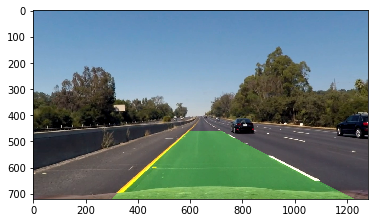

In [310]:
project_output = 'output_video/project_video_out.mp4'
clip = VideoFileClip('project_video.mp4')
project_clip = clip.fl_image(process_image)
%time project_clip.write_videofile(project_output, audio=False)

In [313]:
HTML("""
<video width="1280" height="720" controls>
  <source src="{0}">
</video>
""".format(project_output))